In [ ]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#liblaries for ML
from scipy import stats
import sklearn as sk
from sklearn.feature_selection import mutual_info_regression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.linear_model import LinearRegression

In [ ]:
def download_file(file_name, file_url):
    if os.path.exists(file_name):
        pass
    else:
        response = requests.get(file_url)
        if response.status_code == 200:
            with open(file_name, 'wb') as f:
                f.write(response.content)
            print(f'{file_name} was downloaded')
        else:
            print(f'Failed to download the document. Status code: {response.status_code}')

In [ ]:
file_name = 'ikea.csv'
file_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv'

#EDA

In [ ]:
download_file(file_name, file_url)
df = pd.read_csv(file_name)
print(df)

      Unnamed: 0   item_id                   name       category   price  \
0              0  90420332               FREKVENS  Bar furniture   265.0   
1              1    368814              NORDVIKEN  Bar furniture   995.0   
2              2   9333523  NORDVIKEN / NORDVIKEN  Bar furniture  2095.0   
3              3  80155205                   STIG  Bar furniture    69.0   
4              4  30180504                NORBERG  Bar furniture   225.0   
...          ...       ...                    ...            ...     ...   
3689        3689  99157902                ELVARLI      Wardrobes   750.0   
3690        3690   9158152                ELVARLI      Wardrobes  1572.0   
3691        3691  59157541                ELVARLI      Wardrobes   924.0   
3692        3692  89157573                ELVARLI      Wardrobes  2745.0   
3693        3693  69157376                ELVARLI      Wardrobes  1231.0   

         old_price  sellable_online  \
0     No old price             True   
1     No 

In [ ]:
print(df.nunique())

Unnamed: 0           3694
item_id              2962
name                  607
category               17
price                 979
old_price             365
sellable_online         2
link                 2962
other_colors            2
short_description    1706
designer              381
depth                 114
height                193
width                 263
dtype: int64


item_id - unique number for item. Type: int64

name - name of item. Type: int64

category - category name. Type: int64

price - price of item. Type: float64

old_price - have or not old_price. Type: object

sellable_online - item in online market. Type: bool

link - link on item in market. Type: object

other_colors - available or not different color of item. Type: object

short_description - short info about item. Type: object

designer - designer name. Type: object

depth - depth of item. Type: float64

height - height of item. Type: float64

width - width of item. Type: float64

In [ ]:
print(df.head())

   Unnamed: 0   item_id                   name       category   price  \
0           0  90420332               FREKVENS  Bar furniture   265.0   
1           1    368814              NORDVIKEN  Bar furniture   995.0   
2           2   9333523  NORDVIKEN / NORDVIKEN  Bar furniture  2095.0   
3           3  80155205                   STIG  Bar furniture    69.0   
4           4  30180504                NORBERG  Bar furniture   225.0   

      old_price  sellable_online  \
0  No old price             True   
1  No old price            False   
2  No old price            False   
3  No old price             True   
4  No old price             True   

                                                link other_colors  \
0  https://www.ikea.com/sa/en/p/frekvens-bar-tabl...           No   
1  https://www.ikea.com/sa/en/p/nordviken-bar-tab...           No   
2  https://www.ikea.com/sa/en/p/nordviken-nordvik...           No   
3  https://www.ikea.com/sa/en/p/stig-bar-stool-wi...          Yes   

In [ ]:
print(df.tail())

      Unnamed: 0   item_id     name   category   price old_price  \
3689        3689  99157902  ELVARLI  Wardrobes   750.0    SR 820   
3690        3690   9158152  ELVARLI  Wardrobes  1572.0  SR 1,755   
3691        3691  59157541  ELVARLI  Wardrobes   924.0  SR 1,050   
3692        3692  89157573  ELVARLI  Wardrobes  2745.0  SR 3,130   
3693        3693  69157376  ELVARLI  Wardrobes  1231.0  SR 1,535   

      sellable_online                                               link  \
3689             True  https://www.ikea.com/sa/en/p/elvarli-1-section...   
3690             True  https://www.ikea.com/sa/en/p/elvarli-2-section...   
3691             True  https://www.ikea.com/sa/en/p/elvarli-2-section...   
3692             True  https://www.ikea.com/sa/en/p/elvarli-3-section...   
3693             True  https://www.ikea.com/sa/en/p/elvarli-2-section...   

     other_colors                               short_description  \
3689           No            1 section,          92x51x222-350 cm

In [ ]:
print(df.sample(5))

      Unnamed: 0   item_id      name                    category   price  \
1170        1170  10441786   ÖRFJÄLL                      Chairs   195.0   
1011        1011  60303481    MALSJÖ        Cabinets & cupboards  1516.0   
3113        3113  60252877    BEKANT              Tables & desks   745.0   
761          761  89297663   JONAXEL  Bookcases & shelving units   670.0   
3153        3153  40400529  EKEDALEN              Tables & desks   796.0   

         old_price  sellable_online  \
1170  No old price             True   
1011      SR 1,895             True   
3113  No old price             True   
761         SR 671             True   
3153        SR 995             True   

                                                   link other_colors  \
1170  https://www.ikea.com/sa/en/p/oerfjaell-childre...           No   
1011  https://www.ikea.com/sa/en/p/malsjoe-glass-doo...           No   
3113  https://www.ikea.com/sa/en/p/bekant-frame-for-...          Yes   
761   https://www.ik

In [ ]:
df.shape

(3694, 14)

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
print('\nColumns info')
print(df.info())


Columns info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB
None


In [ ]:
print('\nColumns nulls')
print(df.isnull().sum())


Columns nulls
Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64


In [ ]:
print('\nMain stat info')
print(df.describe())


Main stat info
        Unnamed: 0       item_id        price        depth       height  \
count  3694.000000  3.694000e+03  3694.000000  2231.000000  2706.000000   
mean   1846.500000  4.863240e+07  1078.208419    54.379202   101.679970   
std    1066.510275  2.888709e+07  1374.652494    29.958351    61.097585   
min       0.000000  5.848700e+04     3.000000     1.000000     1.000000   
25%     923.250000  2.039057e+07   180.900000    38.000000    67.000000   
50%    1846.500000  4.928808e+07   544.700000    47.000000    83.000000   
75%    2769.750000  7.040357e+07  1429.500000    60.000000   124.000000   
max    3693.000000  9.993262e+07  9585.000000   257.000000   700.000000   

             width  
count  3105.000000  
mean    104.470853  
std      71.133771  
min       1.000000  
25%      60.000000  
50%      80.000000  
75%     140.000000  
max     420.000000  


# Початковий аналіз датасету:

1. **Потенційні дублікати**: Абсолютних дублікатів немає, проте різниця між загальною кількістю записів (3694) і унікальними значеннями `item_id` (2962) вказує на можливу наявність дублікатів у датасеті. Також, у колонці `link` лише 2962 унікальні значення, що підтверджує гіпотезу про присутність дублікатів, оскільки посилання, ймовірно, повинне бути для кожного товару.

2. **Залежність ціни від категорії**: У датасеті є 17 категорій, що дозволяє припустити, що ціна залежить від категорії товару. Перевірка цього припущення є більш зручною та доцільною, ніж аналіз залежності ціни від назви товару, яких є 607 унікальних значень.

3. **Типи даних**: Поля `sellable_online` та `other_colors` імовірно є булевими (True/False), що можна підтвердити перевіркою унікальних значень у цих колонках.

4. **Колонка `short_description`**: Опис товару (`short_description`) імовірно не є важливим для подальшого аналізу і може бути виключений, оскільки містить текстові дані, які не впливають на числові характеристики товарів.

5. **Інтерпретація `item_id`**: Колонку `item_id` можна розглядати як ідентифікатор товару, аналог штрих-коду, тому статистичний аналіз цієї колонки не має сенсу.

6. **Розподіл ціни**: Середнє значення значно відрізняється від медіани, що вказує на ненормальний розподіл цін у датасеті. Це слід враховувати під час вибору моделей для подальшого аналізу.

7. **Діапазон цін**: Значна різниця між мінімальним і максимальним значенням ціни свідчить про значний розкид, що також може вказувати на наявність аномалій.



In [ ]:
df = df.drop_duplicates(['item_id']).reset_index(drop=True)

df.shape

(2962, 14)

In [ ]:
df = df.drop(['item_id', 'link', 'Unnamed: 0'], axis= 1)
df.columns

Index(['name', 'category', 'price', 'old_price', 'sellable_online',
       'other_colors', 'short_description', 'designer', 'depth', 'height',
       'width'],
      dtype='object')

In [ ]:
df['category'].unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

In [ ]:
df['category'].nunique()

17

In [ ]:
df['category'].value_counts()

,count
category,
Bookcases & shelving units,548
Chairs,438
Sofas & armchairs,380
Tables & desks,370
Wardrobes,220
Beds,208
Outdoor furniture,197
Cabinets & cupboards,187
Chests of drawers & drawer units,111


In [ ]:
df_10 = df['category'].value_counts().nlargest(10).reset_index()
df_10.columns = ['category', 'count']
print(df_10)

                           category  count
0        Bookcases & shelving units    548
1                            Chairs    438
2                 Sofas & armchairs    380
3                    Tables & desks    370
4                         Wardrobes    220
5                              Beds    208
6                 Outdoor furniture    197
7              Cabinets & cupboards    187
8  Chests of drawers & drawer units    111
9              TV & media furniture     89


#Data Visualization and Hypothesis Testing

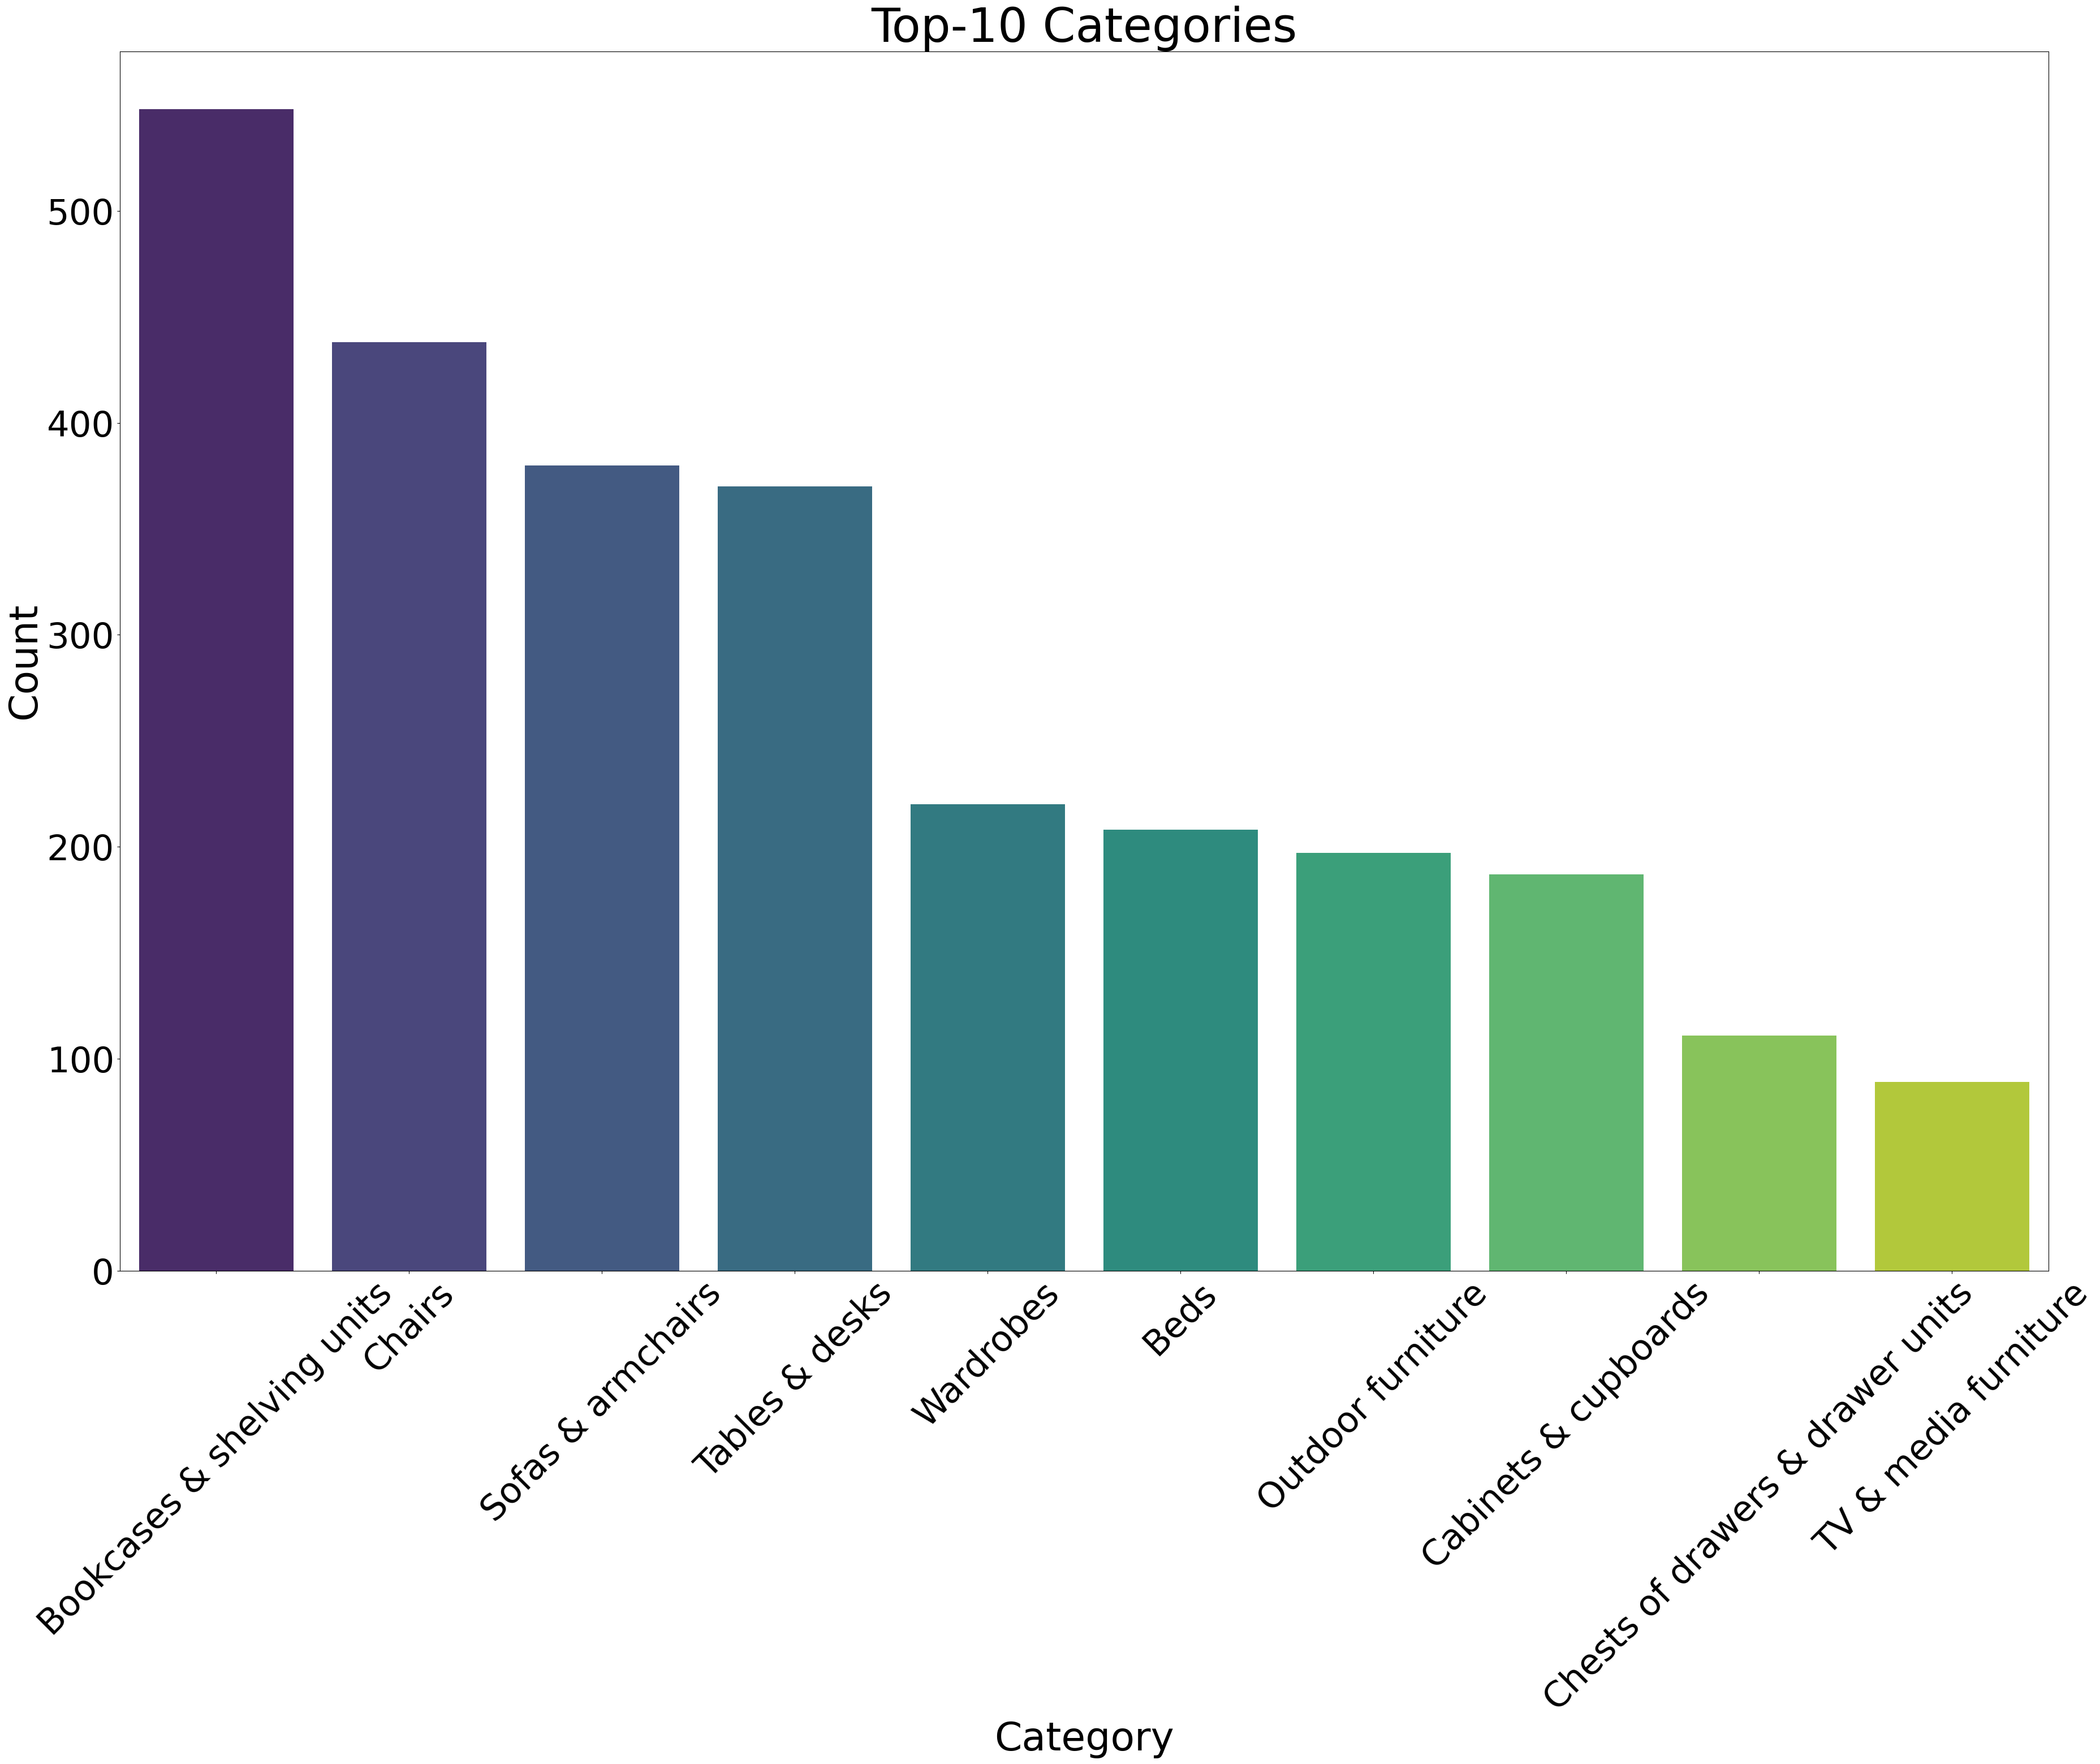

In [ ]:
plt.figure(figsize=(44, 28))
sns.barplot(x='category', y='count', data=df_10, palette='viridis', order=df_10['category'])

plt.title('Top-10 Categories', fontsize=60)
plt.xlabel('Category', fontsize=50)
plt.ylabel('Count', fontsize=50)

plt.xticks(fontsize=45, rotation=45)
plt.yticks(fontsize=45)

plt.show()

In [ ]:
df.groupby('category')['price'].max().sort_values(ascending=False)

,price
category,
Sofas & armchairs,9585.0
Beds,9585.0
Wardrobes,8380.0
Chairs,6965.0
Tables & desks,6614.0
Cabinets & cupboards,6480.0
Outdoor furniture,5144.0
Bookcases & shelving units,4335.0
TV & media furniture,4175.0


In [ ]:
df_category_mean = df.groupby('category')['price'].mean().sort_values(ascending=False)
print(df_category_mean)

category
Wardrobes                               2249.015909
Sofas & armchairs                       1968.160526
Beds                                    1647.432692
Chairs                                  1097.124658
TV & media furniture                    1045.651685
Cabinets & cupboards                    1044.823529
Sideboards, buffets & console tables    1013.000000
Outdoor furniture                        919.759391
Room dividers                            912.600000
Tables & desks                           760.129730
Trolleys                                 748.869565
Bar furniture                            679.553191
Chests of drawers & drawer units         657.490991
Bookcases & shelving units               519.416058
Nursery furniture                        431.772727
Café furniture                           426.722222
Children's furniture                     286.178571
Name: price, dtype: float64


In [ ]:
df_price_category=df.groupby('category')['price'].median().sort_values(ascending=False)
print(df_price_category)

category
Wardrobes                               1950.0
Sofas & armchairs                       1157.0
Beds                                    1093.5
Sideboards, buffets & console tables     927.5
TV & media furniture                     860.0
Cabinets & cupboards                     845.0
Room dividers                            595.0
Trolleys                                 537.0
Chests of drawers & drawer units         499.0
Chairs                                   497.0
Tables & desks                           475.0
Bar furniture                            445.0
Café furniture                           370.0
Outdoor furniture                        345.0
Nursery furniture                        322.5
Bookcases & shelving units               310.0
Children's furniture                     202.5
Name: price, dtype: float64


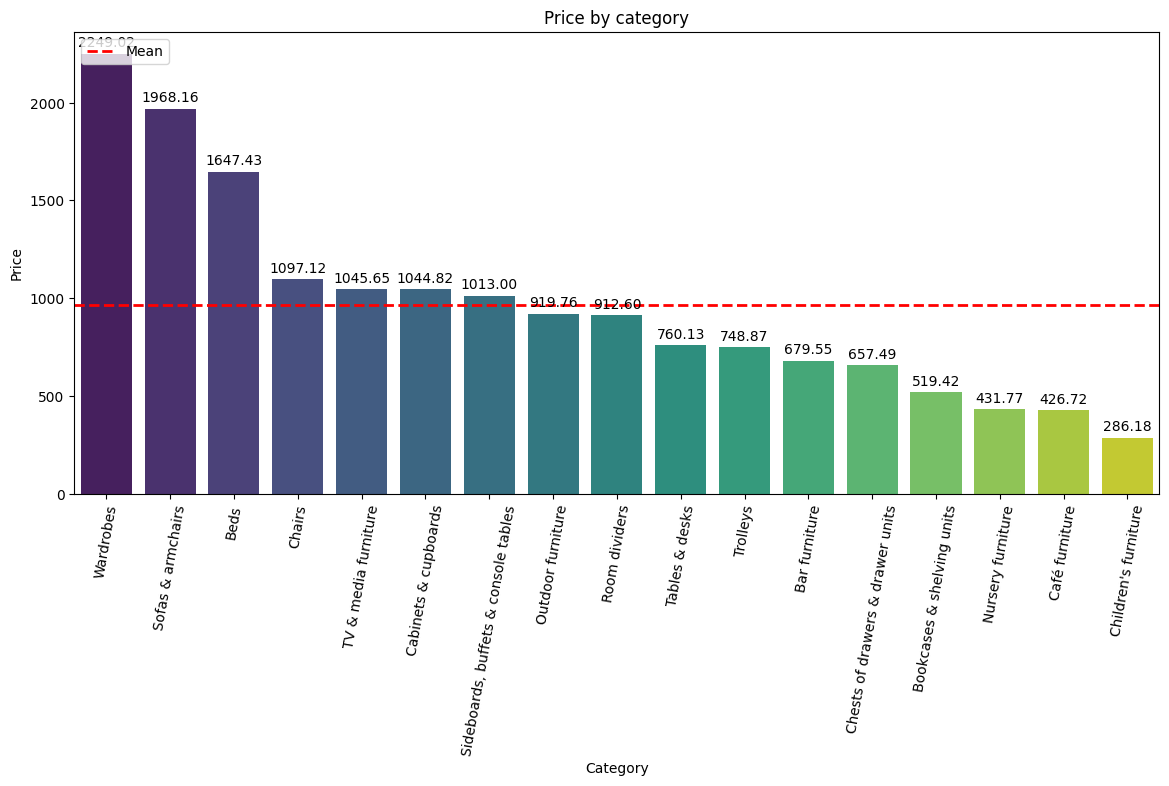

In [ ]:
df_category_mean_sorted = df_category_mean.sort_values(ascending=False)

mean_value = df_category_mean_sorted.mean()

plt.figure(figsize=(14, 6))
ax = sns.barplot(x=df_category_mean_sorted.index, y=df_category_mean_sorted.values, palette='viridis')

plt.axhline(y=mean_value, color='red', linestyle='--', linewidth=2, label='Mean')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Price by category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.xticks(rotation=80)
plt.show()

### Моя гіпотеза: ціна популярних категорій вища, ніж менш популярних категорій.
##### Нульова гіпотеза H0 - категорія товару не впливає на ціну.
##### Альтернативна гіпотеза H1 - ціна менш популярних товарів, вища ніж більш популярних.

#### Якщо моя гіпотеза полягає в тому, що ціна популярних категорій вища, ніж у менш популярних, то результати тестів мають:
##### - Відхилити нульову гіпотезу H0, якщо статистично значуща різниця дійсно існує між цінами двох категорій.
##### - Не підтвердити альтернативну гіпотезу H1, оскільки моя гіпотеза передбачає, що популярні категорії дорожчі, а не дешевші.

##### Результати тесту мають показати значущу різницю, де середня або медіанна ціна в популярних категоріях статистично вища, ніж у менш популярних.

In [ ]:
import unittest

import scipy.stats as stats
from scipy.stats import mannwhitneyu, kruskal
from scipy.stats import ranksums
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon
from statsmodels.stats.multicomp import pairwise_tukeyhsd
category_count=df['category'].value_counts()
sum_category=category_count.sum()
cumulative_percentage =category_count.cumsum()/sum_category

famous_category=category_count[cumulative_percentage < 0.5][::1]
print(f'Категорії, які складають 50% від загальної кількості:')
print(famous_category)

Категорії, які складають 50% від загальної кількості:
category
Bookcases & shelving units    548
Chairs                        438
Sofas & armchairs             380
Name: count, dtype: int64


In [ ]:
famous_category_df=df[df['category'].isin(famous_category.index)]
less_famous_category_df=df[~df['category'].isin(famous_category.index)]
print(famous_category_df.shape)
print(less_famous_category_df.shape)

(1366, 11)
(1596, 11)


In [ ]:
#1) T-test
# T-test: Compares the means of two groups to determine if there is a statistically significant difference between them.
t_statistic, p_value = ttest_ind(famous_category_df['price'], less_famous_category_df['price'],
                                 equal_var=False)
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

famous_category_mean = np.mean(famous_category_df['price'])
less_famous_category_mean = np.mean(less_famous_category_df['price'])
difference_means = famous_category_mean - less_famous_category_mean

if difference_means > 0:
    print('''Меблі популярних категорій дорожчі, ніж меблі менш популярних категорій. ''')
else:
    print('''Меблі, менш популярних категорій дорожчі, ніж меблі популярних категрій. ''')

T-statistic: -0.04
P-value: 0.970
Меблі, менш популярних категорій дорожчі, ніж меблі популярних категрій. 


In [ ]:
# 2) Mann-Whitney-Wilcoxon test
# Mann-Whitney U test: A non-parametric test that compares the distributions of two independent groups to assess whether their central tendencies differ.
statistic, p_value = mannwhitneyu(famous_category_df['price'], less_famous_category_df['price'])

print(f"Statistic: {statistic:.2f}")
print(f"P-value: {p_value:.3f}")

Statistic: 975471.00
P-value: 0.000


In [ ]:
# 3) Bootstrap Test
# Bootstrap test: Uses resampling to estimate the distribution of a statistic and assess the significance of the observed difference between two groups.
n_bootstraps = 10000
diffs = np.empty(n_bootstraps)
for i in range(n_bootstraps):
    famous_samples = np.random.choice(famous_category_df['price'], size=len(famous_category_df), replace=True)
    less_famous_samples = np.random.choice(less_famous_category_df['price'], size=len(less_famous_category_df), replace=True)
    diffs[i] = np.mean(famous_samples) - np.mean(less_famous_samples)

p_value = np.sum(diffs >= 0) / n_bootstraps
print(f"P-value: {p_value:.3f}")

P-value: 0.483


In [ ]:
#4) Shuffle test
# Shuffle test: Randomly shuffles data between two groups to test whether the observed difference is due to random chance.
famous_prices_values = famous_category_df['price'].values
less_famous_prices_values = less_famous_category_df['price'].values

observed_diff = np.mean(famous_prices_values) - np.mean(less_famous_prices_values)

concatenated_prices = np.concatenate([famous_prices_values, less_famous_prices_values])
np.random.shuffle(concatenated_prices)

shuffled_famous_prices = concatenated_prices[:len(famous_prices_values)]
shuffled_less_famous_prices = concatenated_prices[len(famous_prices_values):]

shuffled_diff = np.mean(shuffled_famous_prices) - np.mean(shuffled_less_famous_prices)

n_permutations = 1000
null_distribution = np.zeros(n_permutations)
for i in range(n_permutations):
    np.random.shuffle(concatenated_prices)
    shuffled_famous_prices = concatenated_prices[:len(famous_prices_values)]
    shuffled_less_famous_prices = concatenated_prices[len(famous_prices_values):]
    null_distribution[i] = np.mean(shuffled_famous_prices) - np.mean(shuffled_less_famous_prices)

p_value = np.mean(np.abs(null_distribution) >= np.abs(observed_diff))

print("Observed difference in mean values: {:.2f}".format(observed_diff))
print("P-value: {:.4f}".format(p_value))

Observed difference in mean values: -1.95
P-value: 0.9740


In [ ]:
# 5) Tukey's honestly significant difference (HSD) test
# Tukey's HSD test: Compares the means of multiple groups to identify which pairs of group means are significantly different from each other.
famous_prices = famous_category_df['price']
less_famous_prices = less_famous_category_df['price']

tukey_results = pairwise_tukeyhsd(np.concatenate([famous_prices, less_famous_prices]),
                                  np.concatenate([['famous'] * len(famous_prices),
                                                  ['less-famous'] * len(less_famous_prices)]))

print(tukey_results.summary())

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1    group2   meandiff p-adj   lower    upper   reject
-----------------------------------------------------------
famous less-famous   1.9475 0.9698 -98.7875 102.6825  False
-----------------------------------------------------------


In [ ]:
# 6) ANOVA test - analysis of variance
# ANOVA (Analysis of Variance): Tests whether there are significant differences in the means of three or more groups.
_, p_value = stats.f_oneway(famous_prices, less_famous_prices)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the average price of furniture "
          "between popular and less famous categories.")
else:
    print("The null hypothesis could not be rejected. Significant difference in the average price of furniture "
          "there is no difference between popular and less famous categories")

The null hypothesis could not be rejected. Significant difference in the average price of furniture there is no difference between popular and less famous categories


In [ ]:
# 7) Wilcoxon signed-rank test
# Wilcoxon signed-rank test: A non-parametric test that compares two paired samples to assess whether their distributions differ.
min_length = min(len(famous_prices_values), len(less_famous_prices_values))
famous_prices_values = famous_prices_values[:min_length]
less_famous_prices_values = less_famous_prices_values[:min_length]

statistic, p_value = wilcoxon(famous_prices_values, less_famous_prices_values)

print("Test statistic: {:.2f}".format(statistic))
print("P-value: {:.4f}".format(p_value))

Test statistic: 441694.50
P-value: 0.2569


In [ ]:
# 8) Wilcoxon rank-sum test
# Wilcoxon rank-sum test: This test compares two independent groups to assess differences in their distributions.
statistic, p_value = ranksums(famous_prices_values, less_famous_prices_values)

print("Test statistic: {:.2f}".format(statistic))
print("P-value: {:.4f}".format(p_value))

Test statistic: -1.47
P-value: 0.1419


In [ ]:
# 9) Kruskal-Wallis test
# Kruskal-Wallis test: This test is used to compare more than two independent groups to evaluate differences in their distributions.
statistic, p_value = kruskal(famous_category_df['price'], less_famous_category_df['price'])

print("Test statistic: {:.2f}".format(statistic))
print("P-value: {:.4f}".format(p_value))

Test statistic: 24.40
P-value: 0.0000


##Висновки
###Тест 1
#### T-статистика показує, наскільки відрізняються середні значення двох груп відносно їхніх стандартних похибок. В нашому випадку, t-статистика дорівнює -0.04, що означає відсутність значущої різниці між цінами популярних і менш популярних категорій.
####P-значення дорівнює 0.970, що значно перевищує рівень значущості (наприклад, 0.05).
####Нульову гіпотезу H0 не можна відхилити.
###Тест 2
####Статистика Манна-Уітні дорівнює 975471.00, що вказує на наявність різниці в розподілах цін між популярними і менш популярними категоріями.
####P-значення дорівнює 0.000, що значно нижче рівня значущості (0.05), що підтверджує альтернативну гіпотезу H1.
###Тест 3
####P-значення 0.483 означає, що немає статистично значущої різниці між середніми цінами цих двох груп.
####Нульову гіпотезу H0 не можна відхилити.
###Тест 4
####Шафл-тест показав, що спостережувана різниця середніх значень між популярними і менш популярними категоріями становить -1.95, а p-значення дорівнює 0.9740, що значно перевищує рівень значущості.
####Нульову гіпотезу H0 не можна відхилити.
###Тест 5
####Тест Тьюки показав, що різниця середніх цін між популярними і менш популярними категоріями становить 1.9475, але p-значення 0.9698 вказує на відсутність статистично значущої різниці.
####Нульову гіпотезу H0 не можна відхилити.
###Тест 6
####Оскільки p-значення вище рівня значущості (0.05), нульову гіпотезу не можна відхилити.
###Тест 7
####Тестова статистика дорівнює 441694.50, а p-значення становить 0.2569.
####Нульову гіпотезу H0 не можна відхилити.
###Тест 8
####Tестова статистика становить -1.47, а p-значення дорівнює 0.1419.
####Нульову гіпотезу H0 не можна відхилити.
###Тест 9
####Тестова статистика становить 24.40, а p-значення дорівнює 0.0000, що значно нижче рівня значущості.
####цей тест підтверджує альтернативну гіпотезу H1.
##Загальний висновок
####2 тести (Kruskal-Wallis і Mann-Whitney U) показали значущу різницю між цінами. Я вважаю ці тести одними з найбільш вагомих та вартих уваги, результатами яких не можна нехтувати.
####7 тестів показали, що статистично значущої різниці між популярними та менш популярними категоріями немає. До цієї групи так само відносяться два важливі на мою думку тести - Analysis of Variance та Tukey's HSD test.
####Оскільки результати варіюються між тестами, можна припустити, що вплив категорії на ціну в цьому датасеті не є чітким і залежить від методу оцінки. Можливо, різниця в цінах є, але вона може бути незначною або не однорідною у різних підгрупах даних.
####Для більш точного розуміння впливу категорій на ціну, варто дослідити додаткові аспекти даних, такі як розподіл цін усередині категорій, взаємодія з іншими змінними, або використовувати більш складні моделі для аналізу.


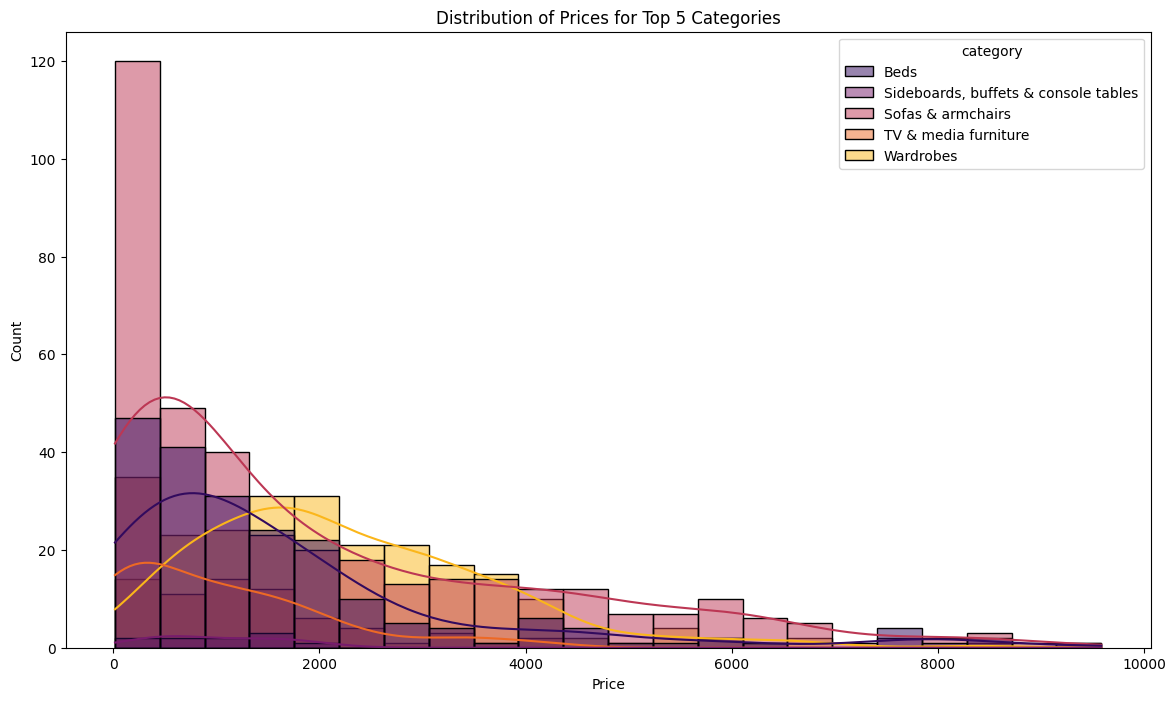

In [ ]:
df_price_category_top5 = df.groupby('category')['price'].median().sort_values().tail(5).index
df_top5 = df[df['category'].isin(df_price_category_top5)]

plt.figure(figsize=(14, 8))

sns.histplot(x='price', hue='category', data=df_top5, palette='inferno', fill=True, kde=True, common_norm=False)

plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Prices for Top 5 Categories')
plt.show()

<Axes: xlabel='price', ylabel='category'>

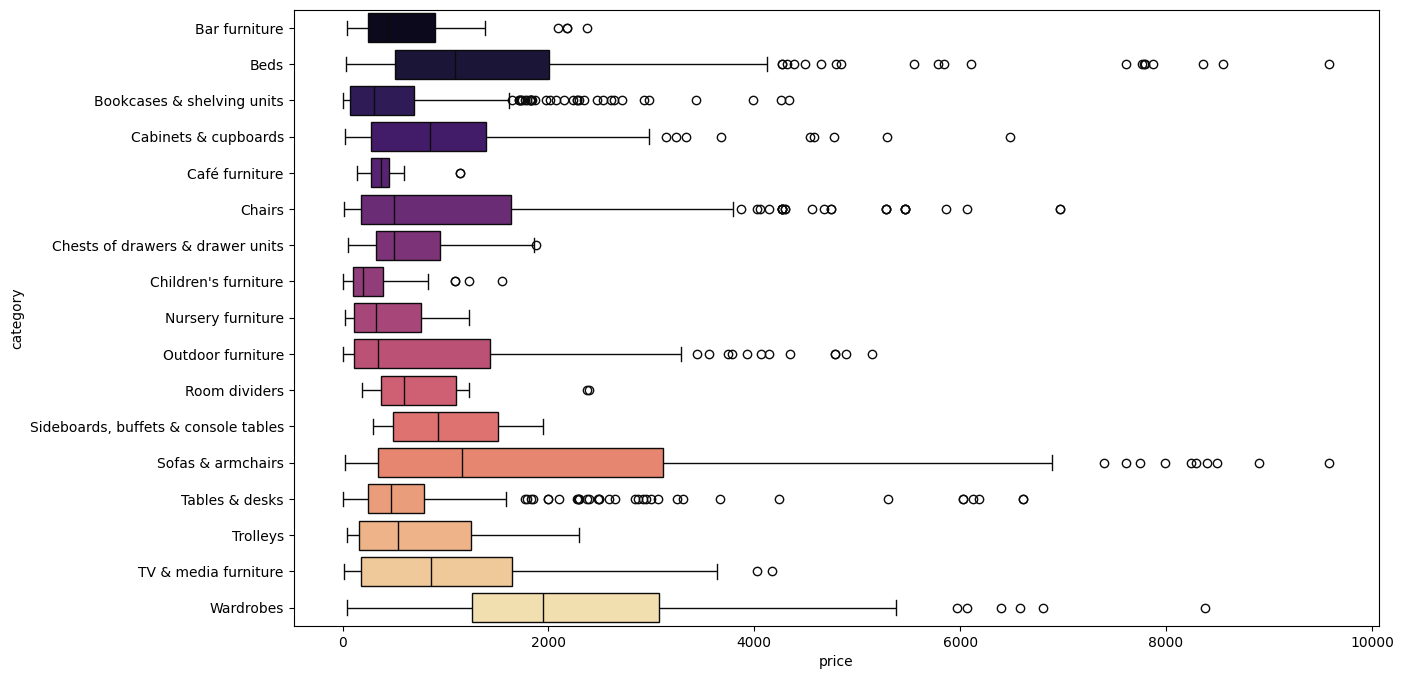

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(df, x='price', y='category', palette = 'magma' )

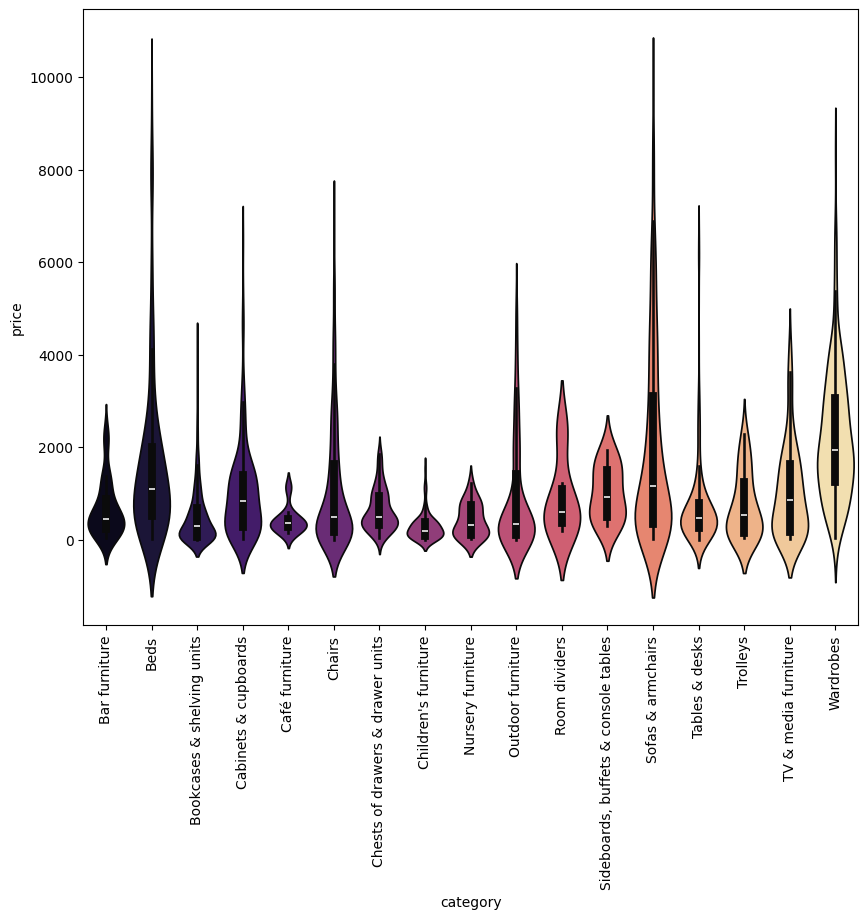

In [ ]:
plt.subplots(figsize = (10,8))
sns.violinplot(data=df, x='category', y='price', palette = 'magma')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Дослідження категорій з найнижчими цінами
df_price_min=df.groupby('category')['price'].min()
print(df_price_min)

category
Bar furniture                            40.0
Beds                                     30.0
Bookcases & shelving units                3.0
Cabinets & cupboards                     22.0
Café furniture                          145.0
Chairs                                   11.4
Chests of drawers & drawer units         49.0
Children's furniture                      5.0
Nursery furniture                        25.0
Outdoor furniture                         9.0
Room dividers                           189.0
Sideboards, buffets & console tables    295.0
Sofas & armchairs                        27.0
TV & media furniture                     17.0
Tables & desks                            9.0
Trolleys                                 39.0
Wardrobes                                45.0
Name: price, dtype: float64


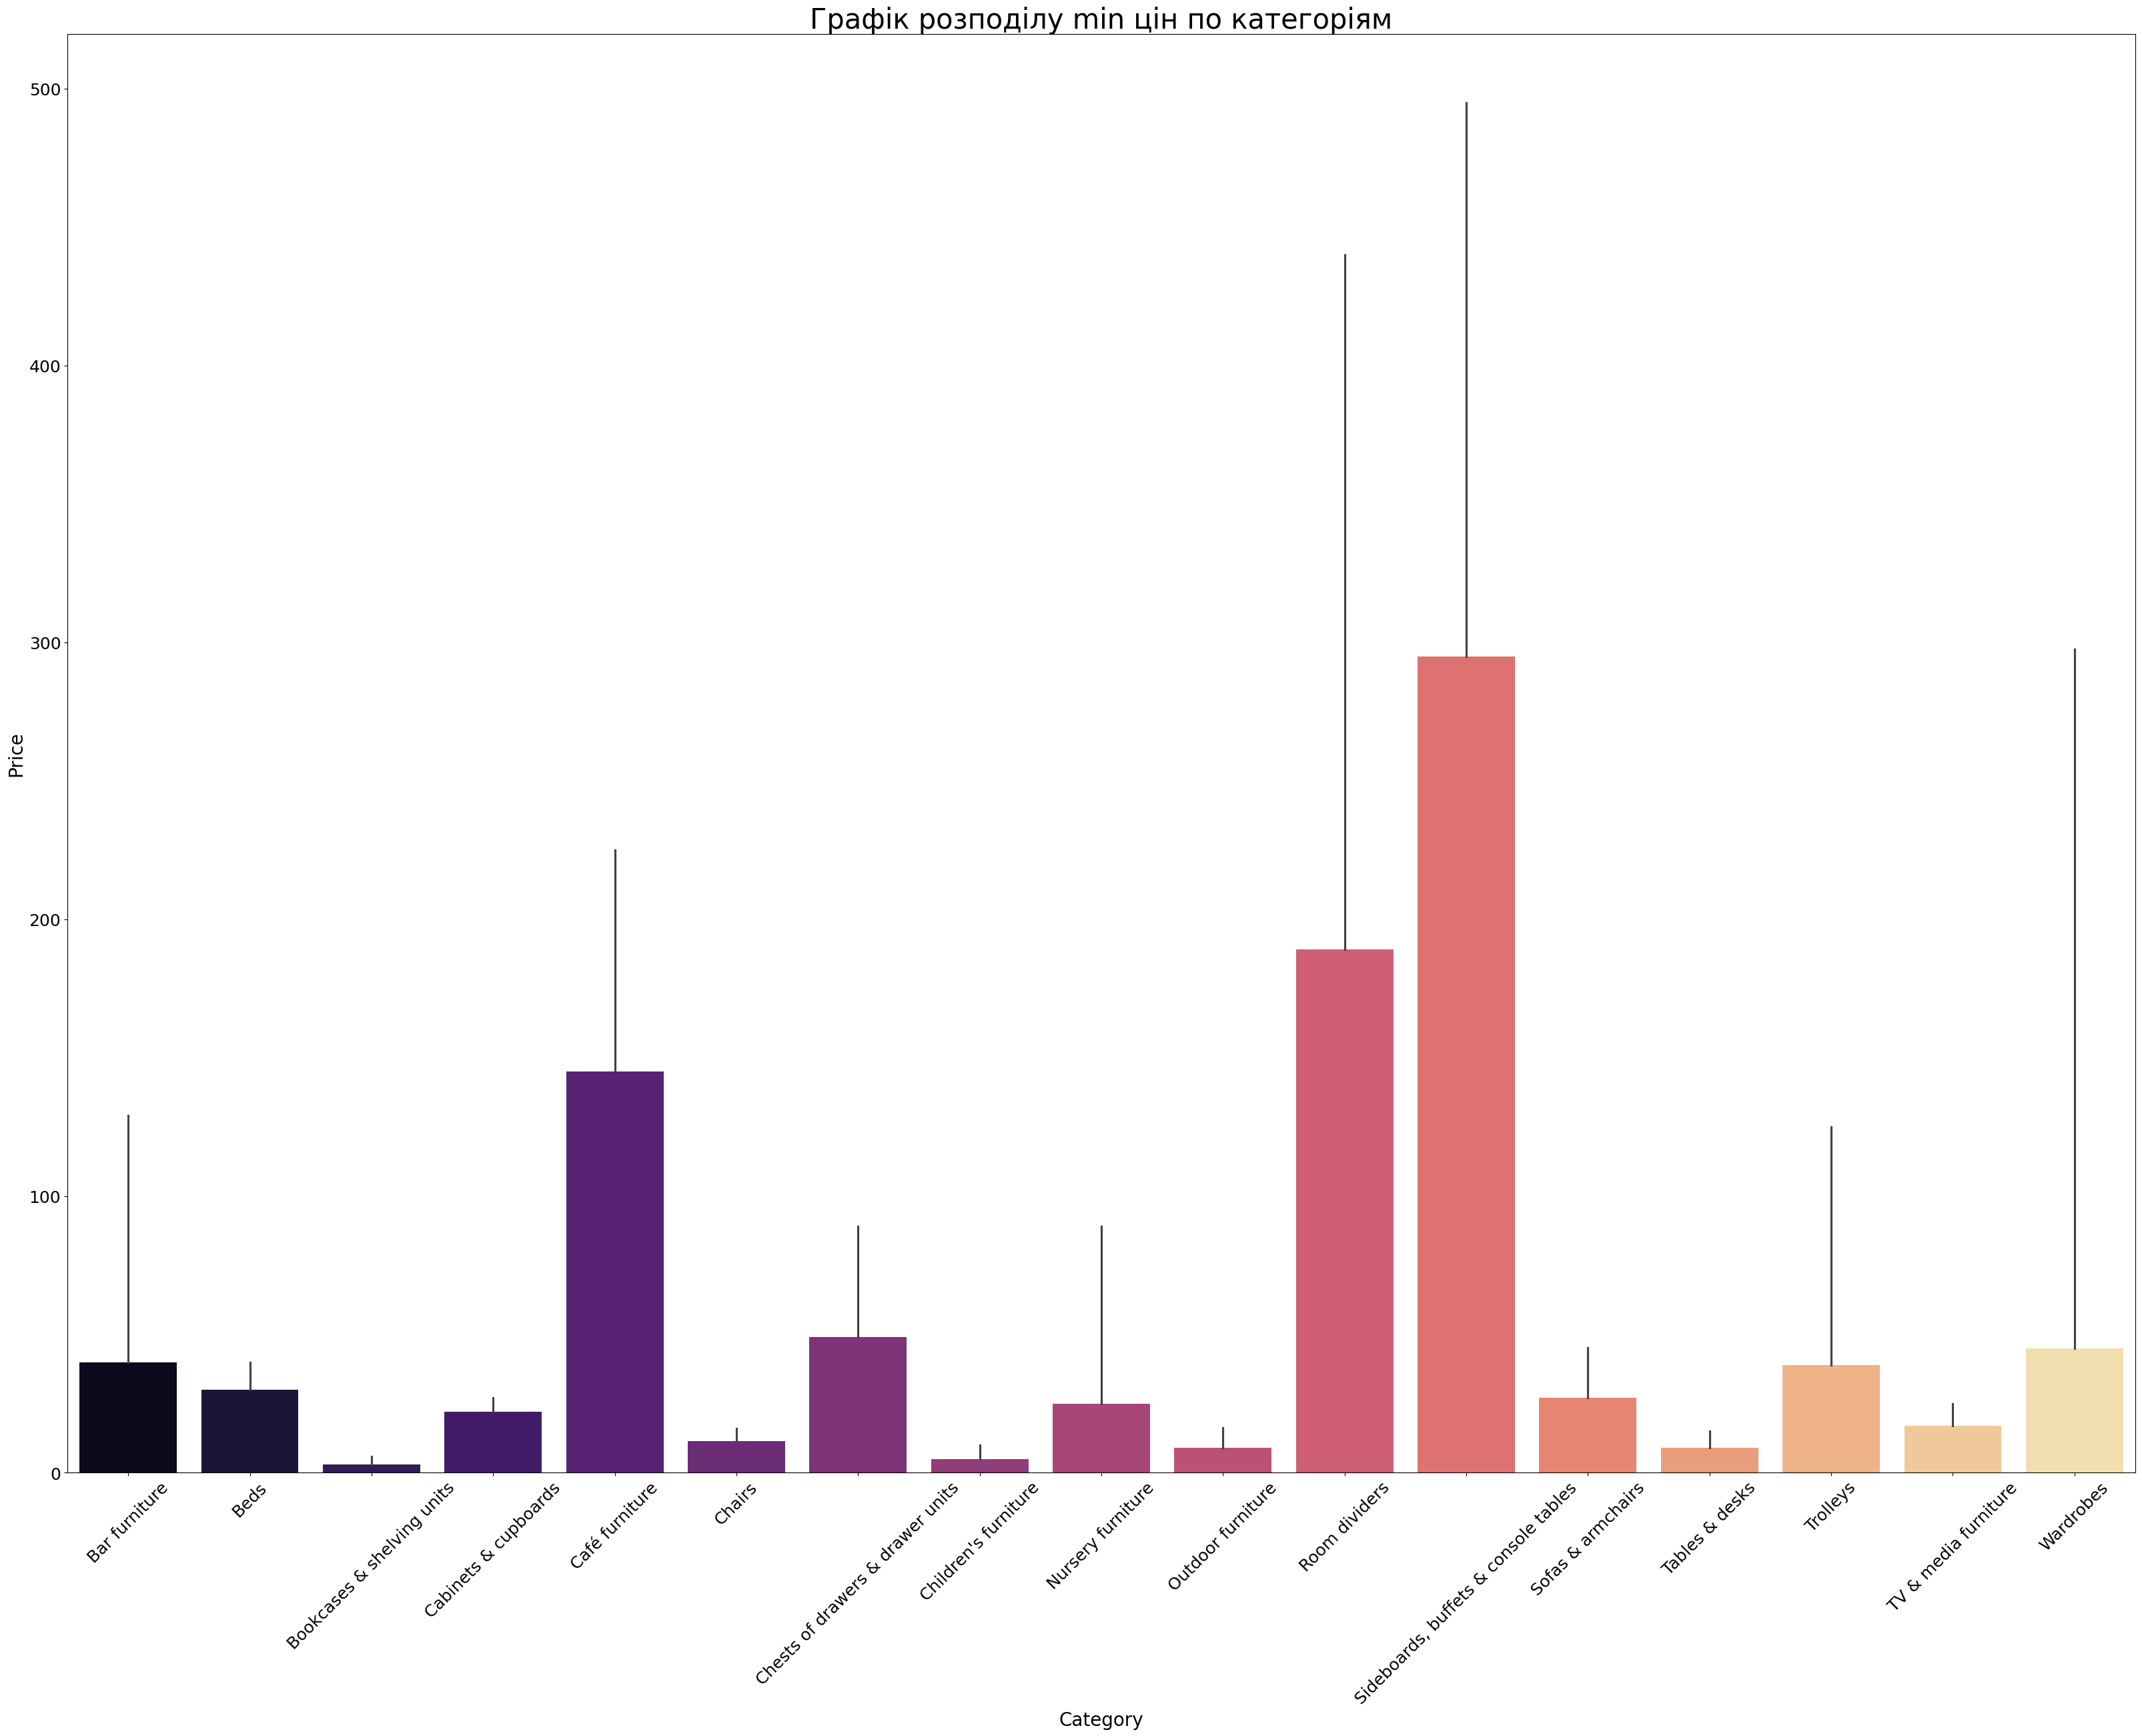

In [ ]:
plt.figure(figsize=(40, 28))
sns.barplot(x='category', y='price', data=df, estimator=np.min, palette='magma')

plt.title('Графік розподілу min цін по категоріям', fontsize=30)
plt.xlabel('Category', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

####Отримані результати показують, що ціни в категоріях значно різняться і наявні викиди.
###Загалом, я роблю висновок, що параметр category не має однозначного впливу на ціну, і його використання в подальшому аналізі може бути неефективним.

####Розглянемо інші характеристики, такі як наявність інших кольорів, можливість продажу меблів онлайн та оцінимо різних дизайнерів виробів.

In [ ]:
# Lets investigate 'other_colors' column
df['other_colors'].describe()

,other_colors
count,2962
unique,2
top,No
freq,1637


In [ ]:
df_colors=df.groupby('other_colors')['price'].mean()
print(df_colors)

other_colors
No      981.540867
Yes    1265.851925
Name: price, dtype: float64


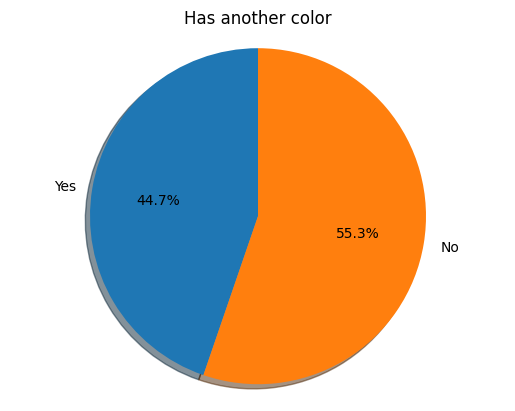

In [ ]:
labels = 'Yes', 'No'
sizes = [(df['other_colors']=='Yes').sum(), (df['other_colors']=='No').sum()]
explode = [0, 0]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Has another color')
plt.show()

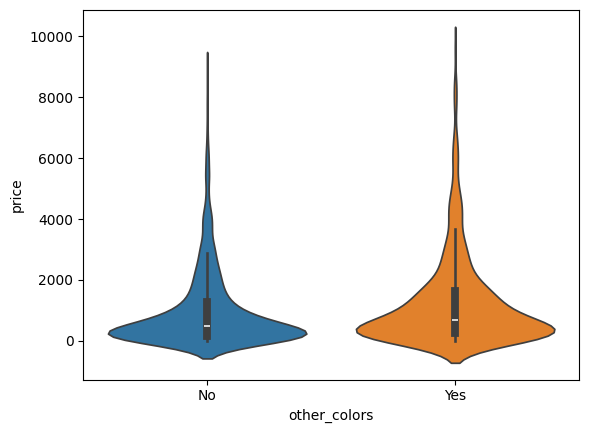

In [ ]:
colors = plt.get_cmap('tab10').colors[:2]

sns.violinplot(data=df, y='price', x='other_colors', palette=colors)
plt.show()

In [ ]:
#Створимо нову колонку для наявності додаткових кольорів
df['other_colors_1'] = df['other_colors'].map(dict(Yes=1, No=0))
df = df.reset_index()
df.head()

,index,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width,other_colors_1
0,0,FREKVENS,Bar furniture,265.0,No old price,True,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,0
1,1,NORDVIKEN,Bar furniture,995.0,No old price,False,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,0
2,2,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,0
3,3,STIG,Bar furniture,69.0,No old price,True,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,1
4,4,NORBERG,Bar furniture,225.0,No old price,True,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,0


<Axes: xlabel='price', ylabel='Density'>

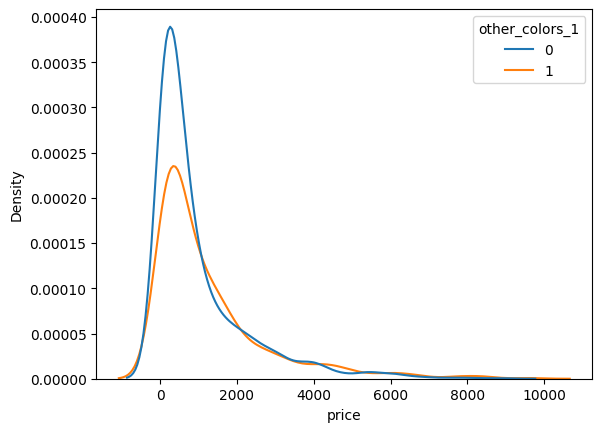

In [ ]:
sns.kdeplot(data=df, x='price', hue='other_colors_1')

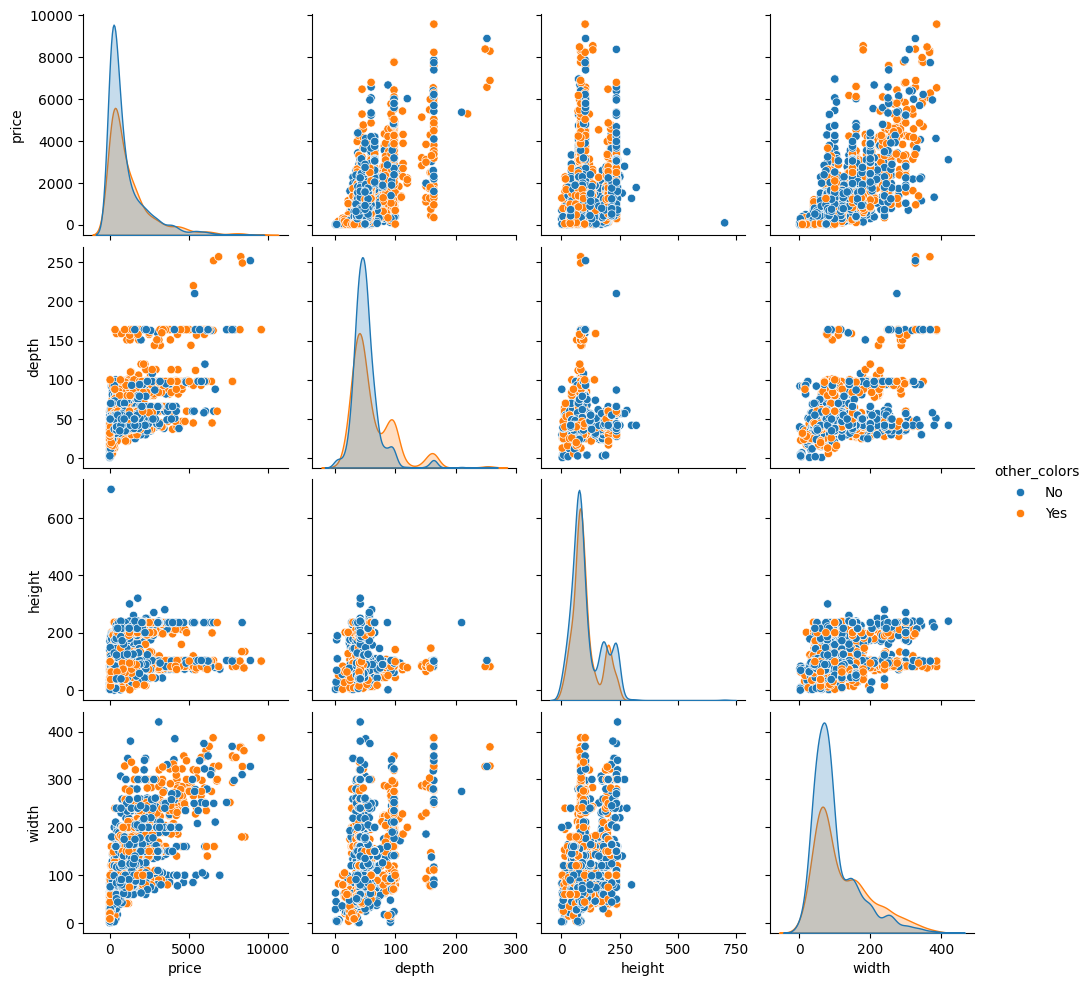

In [ ]:
sns.pairplot(df[['price', 'depth', 'height', 'width', 'other_colors', 'category']], hue = 'other_colors');

Text(0.5, 1.0, 'Other colors in price')

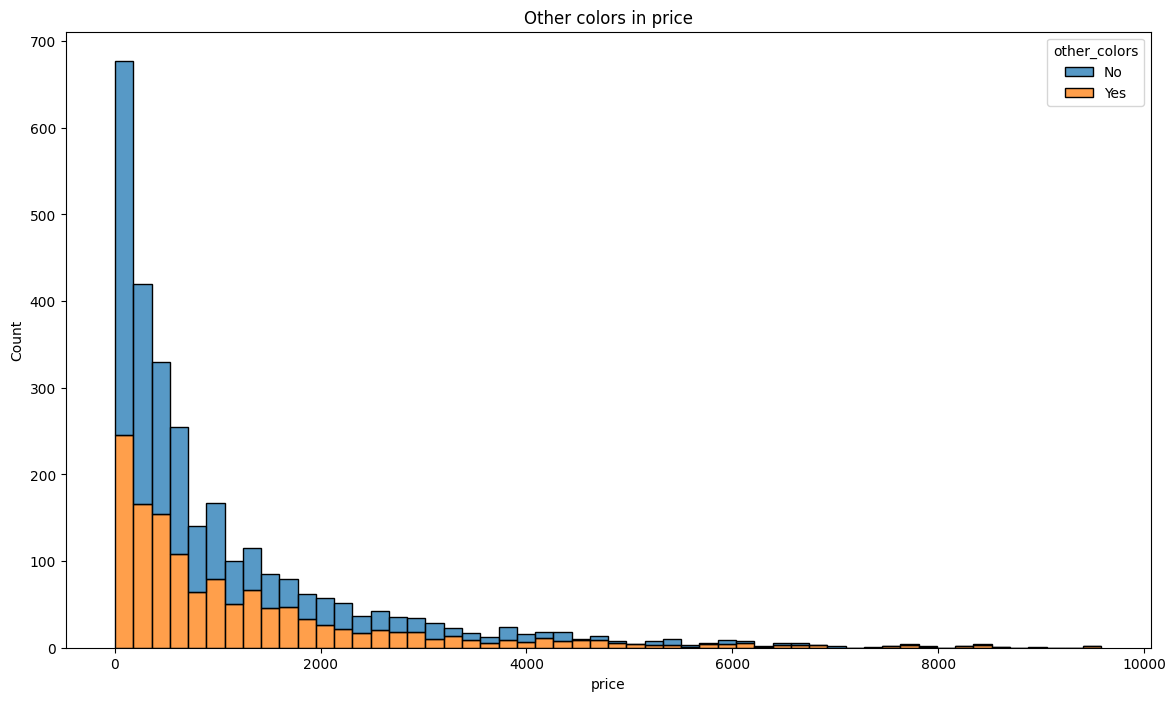

In [ ]:
plt.figure(figsize=(14, 8))
sns.histplot(data=df, x="price", hue="other_colors", multiple="stack")
plt.title("Other colors in price")

In [ ]:
df_colors = df.groupby('category')['other_colors'].value_counts().unstack()
print(df_colors)

other_colors                           No  Yes
category                                      
Bar furniture                          42    5
Beds                                  115   93
Bookcases & shelving units            319  229
Cabinets & cupboards                   47  140
Café furniture                         13    5
Chairs                                343   95
Chests of drawers & drawer units       56   55
Children's furniture                   56   28
Nursery furniture                      15    7
Outdoor furniture                     121   76
Room dividers                           5    5
Sideboards, buffets & console tables    2    8
Sofas & armchairs                      62  318
TV & media furniture                   24   65
Tables & desks                        214  156
Trolleys                               22    1
Wardrobes                             181   39


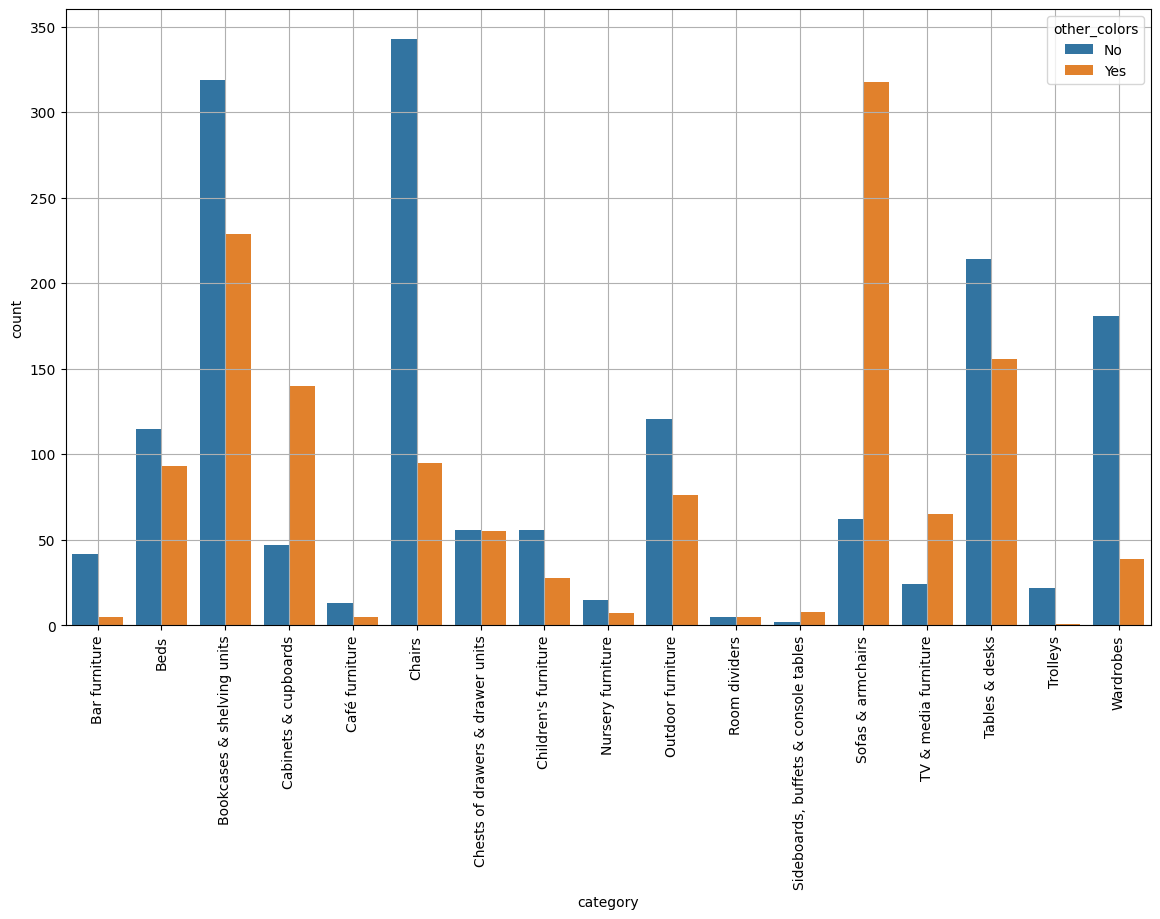

In [ ]:
df_colors_melted = df_colors.reset_index().melt(id_vars='category', var_name='other_colors', value_name='count')

plt.figure(figsize = (14,8))
sns.barplot(data=df_colors_melted, x='category', y='count', hue='other_colors')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
yes_samples = df[df['other_colors'] == 'Yes'].sample(5)
print(yes_samples)

      index       name                    category  price     old_price  \
1946   1946  STOCKSUND           Sofas & armchairs  345.0  No old price   
1064   1064      POÄNG                      Chairs  790.0  No old price   
364     364       EKET  Bookcases & shelving units   80.0  No old price   
2734   2734  BERGHALLA        TV & media furniture   22.0  No old price   
526     526   NOTVIKEN  Bookcases & shelving units  100.0  No old price   

      sellable_online other_colors  \
1946             True          Yes   
1064             True          Yes   
364              True          Yes   
2734             True          Yes   
526              True          Yes   

                                      short_description  \
1946                                 Cover for armchair   
1064                                      Rocking-chair   
364           Wall-mounted shelving unit,          3...   
2734                             Handle,          56 mm   
526                Door/d

In [ ]:
no_samples = df[df['other_colors'] == 'No'].sample(5)
print(no_samples)

      index      name                    category   price     old_price  \
693     693      BROR  Bookcases & shelving units  1335.0  No old price   
1759   1759   ÄPPLARÖ           Outdoor furniture  1445.0  No old price   
450     450   EDVALLA  Bookcases & shelving units    25.0  No old price   
2162   2162     KIVIK           Sofas & armchairs  6400.0      SR 8,000   
2346   2346  REGISSÖR              Tables & desks   745.0  No old price   

      sellable_online other_colors  \
693              True           No   
1759             True           No   
450              True           No   
2162             True           No   
2346             True           No   

                                      short_description             designer  \
693           Shelving unit with cabinets,          ...       IKEA of Sweden   
1759                           Table+2 benches, outdoor  K Hagberg/M Hagberg   
450                         Drop handle,          18 mm    Francis Cayouette   


####Хочу провести короткий аналіз і визначити, чи впливає наявність декількох кольорів на вищу ціну виробу.
####H0 - наявність кількох кольорів не впливає на ціну.
####H1 - товари з кількома кольорами дорожчі.

In [ ]:
# Групи для порівняння
group_with_colors = df[df['other_colors'] == 'Yes']['price']
group_without_colors = df[df['other_colors'] == 'No']['price']

# 1. T-test
t_stat, p_value_ttest = stats.ttest_ind(group_with_colors, group_without_colors, equal_var=False)
print(f"T-test: t-statistic = {t_stat:.2f}, p-value = {p_value_ttest:.4f}")

# 2. Mann-Whitney U test
u_stat, p_value_mannwhitney = stats.mannwhitneyu(group_with_colors, group_without_colors)
print(f"Mann-Whitney U test: U-statistic = {u_stat:.2f}, p-value = {p_value_mannwhitney:.4f}")

# 3. Kruskal-Wallis test
h_stat, p_value_kruskal = stats.kruskal(group_with_colors, group_without_colors)
print(f"Kruskal-Wallis test: H-statistic = {h_stat:.2f}, p-value = {p_value_kruskal:.4f}")

T-test: t-statistic = 5.45, p-value = 0.0000
Mann-Whitney U test: U-statistic = 1239016.50, p-value = 0.0000
Kruskal-Wallis test: H-statistic = 44.57, p-value = 0.0000


####Усі тести підтверджують, що наявність кількох кольорів впливає на ціну, а саме - збільшує її, підтримуючи альтернативну гіпотезу H1.


In [ ]:
# Lets investigate 'sellable_online' column
df['sellable_online'].value_counts()

,count
sellable_online,
True,2943
False,19


In [ ]:
df[df['sellable_online']==False]

,index,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width,other_colors_1
1,1,NORDVIKEN,Bar furniture,995.0,No old price,False,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,0
2,2,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,0
36,36,NORDVIKEN,Bar furniture,275.0,No old price,False,No,"Bar stool with backrest, 75 cm",Francis Cayouette,47.0,101.0,40.0,0
52,52,SLÄKT,Beds,540.0,No old price,False,No,"Ext bed frame with slatted bed base, ...",IKEA of Sweden/Ebba Strandmark,NaN,NaN,91.0,0
160,160,SLÄKT,Beds,520.0,No old price,False,No,"Ext bed frame with slatted bed base, ...",Ebba Strandmark/IKEA of Sweden,NaN,NaN,91.0,0
223,223,SLÄKT,Beds,75.0,No old price,False,Yes,Headboard,Ebba Strandmark,NaN,40.0,90.0,1
618,618,HACKÅS,Bookcases & shelving units,50.0,No old price,False,No,"Handle, 300 mm",J Löfgren/J Pettersson,18.0,NaN,24.0,0
1359,1359,VOLFGANG,Chairs,175.0,No old price,False,No,Stool,704.655.38 You sit comfortably thanks to the r...,43.0,85.0,53.0,0
1400,1400,EKEDALEN / EKEDALEN,Chairs,1245.0,No old price,False,No,"Table and 2 chairs, 80/120 cm",Ehlén Johansson,NaN,NaN,NaN,0
1424,1424,EKEDALEN / ODGER,Chairs,1149.0,"SR 1,385",False,No,"Table and 2 chairs, 80/120 cm",Ehlén Johansson/J Löfgren/J Pettersson,NaN,NaN,NaN,0


####Переважно це товари, які не мають попередньої ціни або мають старий ідентифікатор. Виходячи з цього, можна припустити, що це або застарілі товари, або товари, які вже розпродані.

In [ ]:
# Lets investigate 'designer' column
df['designer'].describe()

,designer
count,3694
unique,381
top,IKEA of Sweden
freq,828


In [ ]:
df['designer'].unique()

array(['Nicholai Wiig Hansen', 'Francis Cayouette', 'Henrik Preutz',
       'Marcus Arvonen', 'Carina Bengs', 'K Hagberg/M Hagberg',
       'Sarah Fager', 'Ehlén Johansson', 'Nike Karlsson',
       'Maja Ganszyniec', 'Karl Malmvall',
       'John/Jonas/Petrus/Paul/Caroline', 'Nike Karlsson/Maja Ganszyniec',
       'J Karlsson/N Karlsson', 'IKEA of Sweden/Karl Malmvall',
       'IKEA of Sweden', 'Nike Karlsson/J Karlsson/N Karlsson',
       'Ola Wihlborg', 'IKEA of Sweden/Tina Christensen',
       'IKEA of Sweden/K Hagberg/M Hagberg',
       'Ola Wihlborg/IKEA of Sweden',
       '504.689.53 Small and easy-to-place chair-bed which can easily be converted into a single bed.The storage space under the seat has room for bedlinen or other things.Just as nice to look at from all sides – perfect to place in the middle of the room or use as a room divider.The cushion cover is easy to keep clean and fresh, as you can take it off and machine-wash it.Easy to assemble.1 cushion included.',
       '

In [ ]:
#Створимо функцію для очищення колонки 'designer'
def cleanDesigners(value, removeIKEA=False, emptyValue=np.nan):
    if not isinstance(value, str):
        return value

    if len(value)>0 and value[0].isdigit():
        return emptyValue

    designers = value.split("/")

    if removeIKEA:
        try:
            designers.remove("IKEA of Sweden")
        except:
            pass
    if len(designers) > 0:
        return '/'.join(sorted(designers))
    else:
        return emptyValue

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv", index_col= 0).drop_duplicates()

df['designer_clean'] = df['designer'].apply(cleanDesigners, args= (False, "IKEA of Sweden"))

In [ ]:
df['designer_clean'].unique()

array(['Nicholai Wiig Hansen', 'Francis Cayouette', 'Henrik Preutz',
       'Marcus Arvonen', 'Carina Bengs', 'K Hagberg/M Hagberg',
       'Sarah Fager', 'Ehlén Johansson', 'Nike Karlsson',
       'Maja Ganszyniec', 'Karl Malmvall',
       'Caroline/John/Jonas/Paul/Petrus', 'Maja Ganszyniec/Nike Karlsson',
       'J Karlsson/N Karlsson', 'IKEA of Sweden/Karl Malmvall',
       'IKEA of Sweden', 'J Karlsson/N Karlsson/Nike Karlsson',
       'Ola Wihlborg', 'IKEA of Sweden/Tina Christensen',
       'IKEA of Sweden/K Hagberg/M Hagberg',
       'IKEA of Sweden/Ola Wihlborg', 'Ebba Strandmark/IKEA of Sweden',
       'Jon Karlsson', 'Carina Bengs/IKEA of Sweden', 'David Wahl',
       'IKEA of Sweden/Jon Karlsson', 'IKEA of Sweden/Paulin Machado',
       'Eva Lilja Löwenhielm/IKEA of Sweden',
       'IKEA of Sweden/Ola Wihlborg/Synnöve Mork',
       'David Wahl/IKEA of Sweden', 'Eva Lilja Löwenhielm',
       'Anna Efverlund/IKEA of Sweden', 'Paulin Machado',
       'Jonas Hultqvist', 'Gustav 

In [ ]:
df['designer_clean'].value_counts()

,count
designer_clean,
IKEA of Sweden,971
Ehlén Johansson,161
Francis Cayouette,151
Ehlén Johansson/IKEA of Sweden,145
Ola Wihlborg,134
...,...
Eva Lilja Löwenhielm/IKEA of Sweden/Jon Karlsson,1
A Huldén/S Dahlman,1
Ehlén Johansson/Fredriksson/Hilland/IKEA of Sweden/L Löwenhielm,1


In [ ]:
designer_df_max=df.groupby('designer_clean')['price'].max()
print(designer_df_max)

designer_clean
A Fredriksson/H Preutz                                   75.0
A Fredriksson/HAY/J Hultqvist/W Chong                  2575.0
A Fredriksson/IKEA of Sweden/J Hultqvist/W Chong        675.0
A Fredriksson/J Hultqvist/Lisa Norinder/W Chong         889.0
A Fredriksson/J Hultqvist/Mikael Warnhammar/W Chong    2575.0
                                                        ...  
Tina Christensen                                       2585.0
Tom Dixon                                              3900.0
Tord Björklund                                         1195.0
Virgil Abloh                                            837.0
Wiebke Braasch                                          575.0
Name: price, Length: 199, dtype: float64


In [ ]:
df.groupby('designer_clean')['price'].mean()

,price
designer_clean,
A Fredriksson/H Preutz,35.900000
A Fredriksson/HAY/J Hultqvist/W Chong,2575.000000
A Fredriksson/IKEA of Sweden/J Hultqvist/W Chong,675.000000
A Fredriksson/J Hultqvist/Lisa Norinder/W Chong,889.000000
A Fredriksson/J Hultqvist/Mikael Warnhammar/W Chong,2575.000000
...,...
Tina Christensen,916.190476
Tom Dixon,1396.136364
Tord Björklund,536.129032


In [ ]:
df.groupby('designer_clean')['category'].value_counts()

designer_clean                         category                  
A Fredriksson/H Preutz                 Bookcases & shelving units    20
                                       Cabinets & cupboards          20
                                       TV & media furniture          20
A Fredriksson/HAY/J Hultqvist/W Chong  Chairs                         1
                                       Tables & desks                 1
                                                                     ..
Virgil Abloh                           Cabinets & cupboards           1
                                       Chairs                         1
                                       Tables & desks                 1
Wiebke Braasch                         Tables & desks                 1
                                       Trolleys                       1
Name: count, Length: 568, dtype: int64

In [ ]:
#top 10 popular designers
designer_df_top10=df['designer_clean'].value_counts()[0:10]
print(designer_df_top10)

designer_clean
IKEA of Sweden                    971
Ehlén Johansson                   161
Francis Cayouette                 151
Ehlén Johansson/IKEA of Sweden    145
Ola Wihlborg                      134
K Hagberg/M Hagberg               122
Jon Karlsson                      120
Carina Bengs                       75
Henrik Preutz                      70
Studio Copenhagen                  64
Name: count, dtype: int64


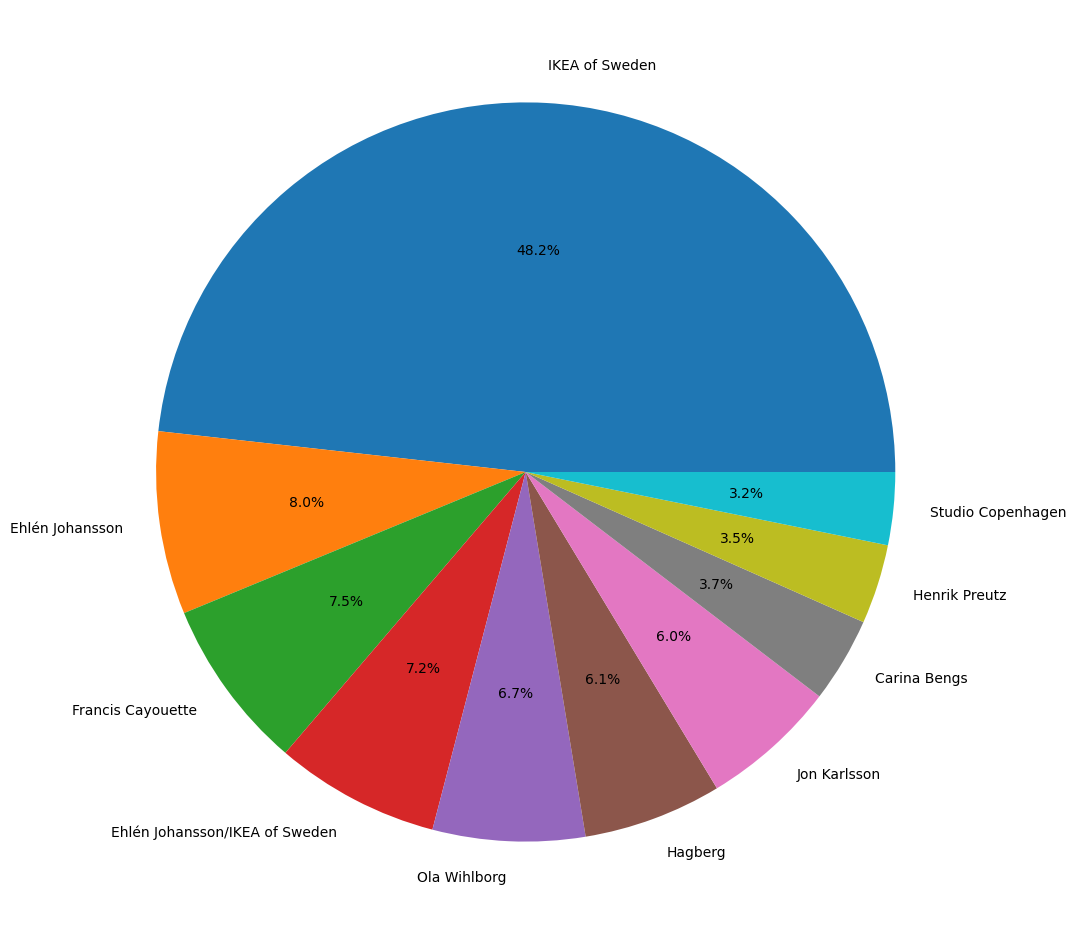

In [ ]:
fig,ax=plt.subplots(figsize=(12,12))
y=designer_df_top10
mylabels=['IKEA of Sweden', 'Ehlén Johansson', 'Francis Cayouette', 'Ehlén Johansson/IKEA of Sweden','Ola Wihlborg', 'Hagberg', 'Jon Karlsson', 'Carina Bengs', 'Henrik Preutz', 'Studio Copenhagen']
ax.pie(y, labels=mylabels, autopct='%1.1f%%')
plt.show()

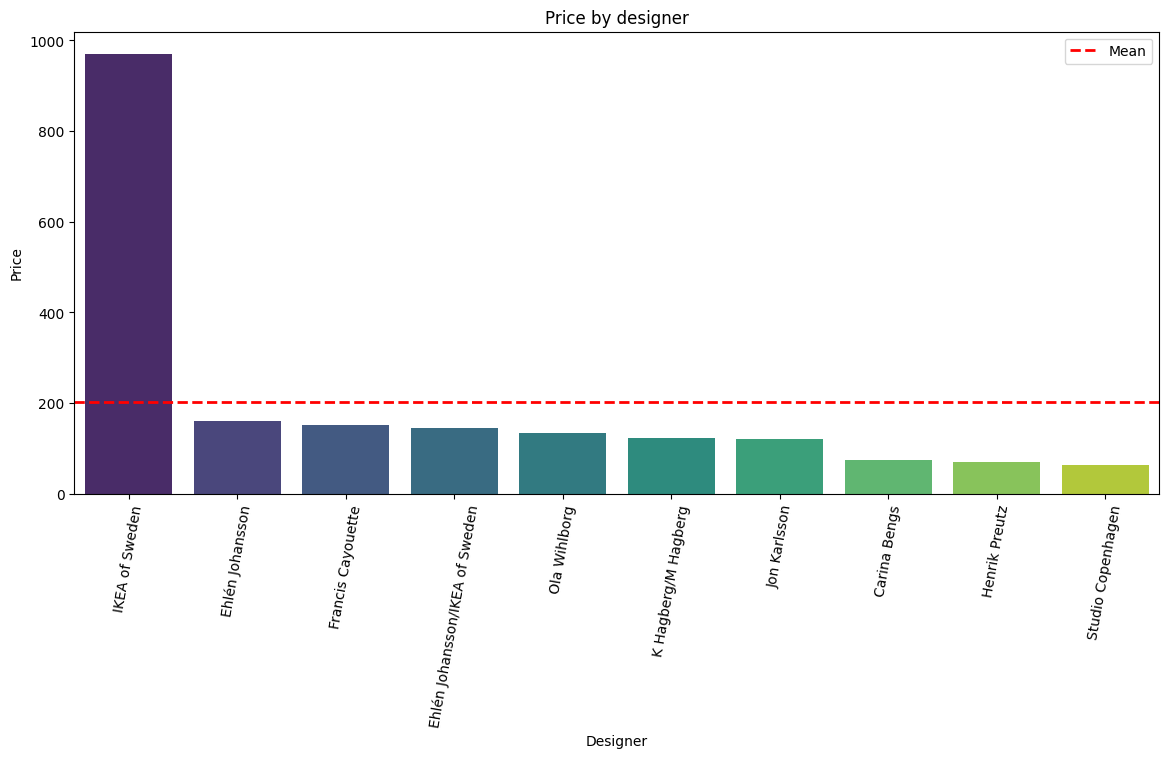

In [ ]:
mean_value = designer_df_top10.mean()
plt.figure(figsize=(14, 6))

sns.barplot(x=designer_df_top10.index, y=designer_df_top10.values, palette='viridis')
plt.axhline(y=mean_value, color='red', linestyle='--', linewidth=2, label='Mean')

plt.title('Price by designer')
plt.xlabel('Designer')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.xticks(rotation=80)
plt.show()

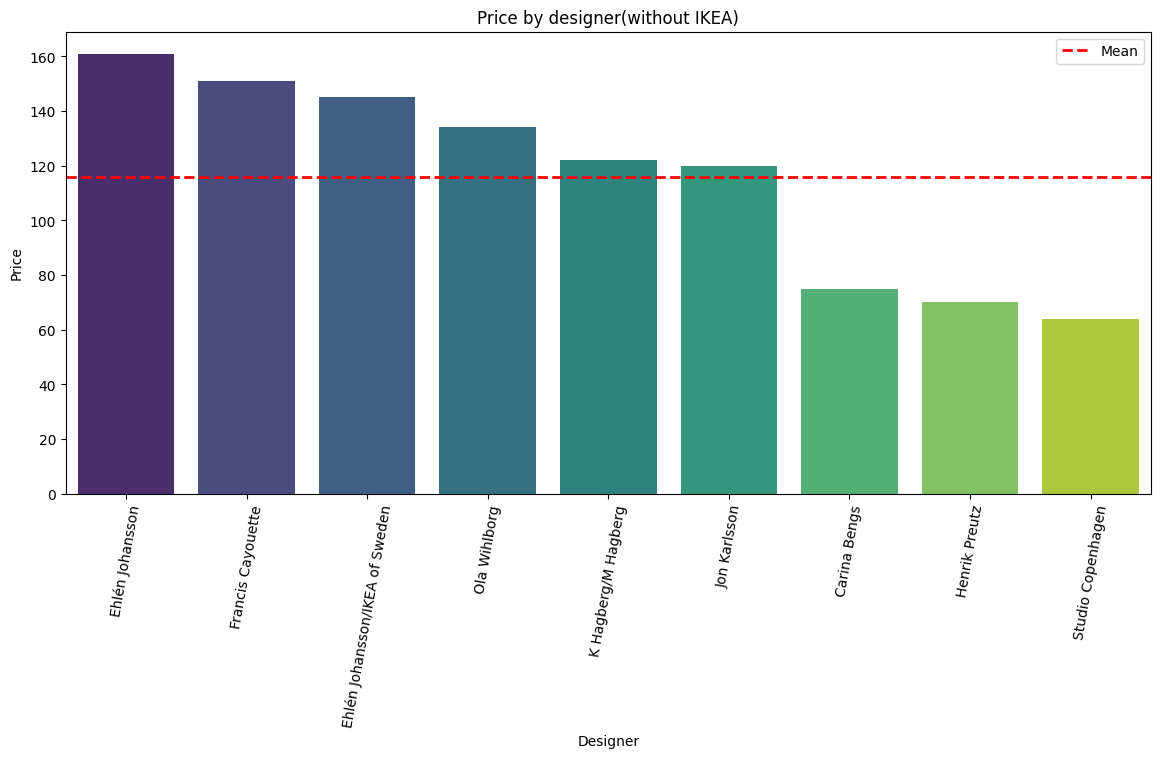

In [ ]:
mean_value = designer_df_top10[1:10].mean()
plt.figure(figsize=(14, 6))

sns.barplot(x=designer_df_top10[1:10].index, y=designer_df_top10[1:10].values, palette='viridis')
plt.axhline(y=mean_value, color='red', linestyle='--', linewidth=2, label='Mean')

plt.title('Price by designer(without IKEA)')
plt.xlabel('Designer')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.xticks(rotation=80)
plt.show()

<Axes: xlabel='price', ylabel='designer_clean'>

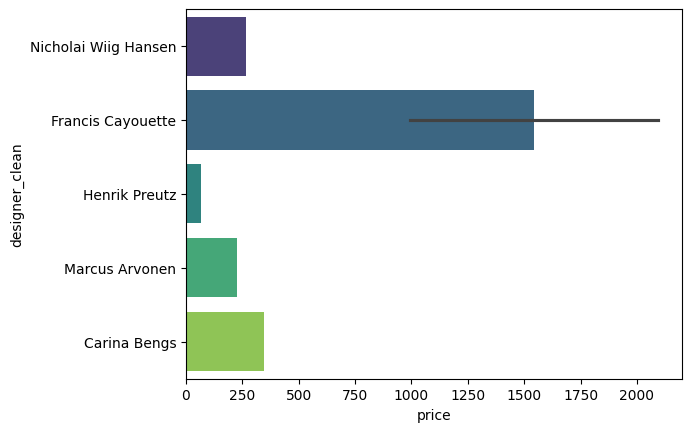

In [ ]:
df1=df[0:6]
sns.barplot(x='price', y='designer_clean', data=df1, palette = 'viridis')

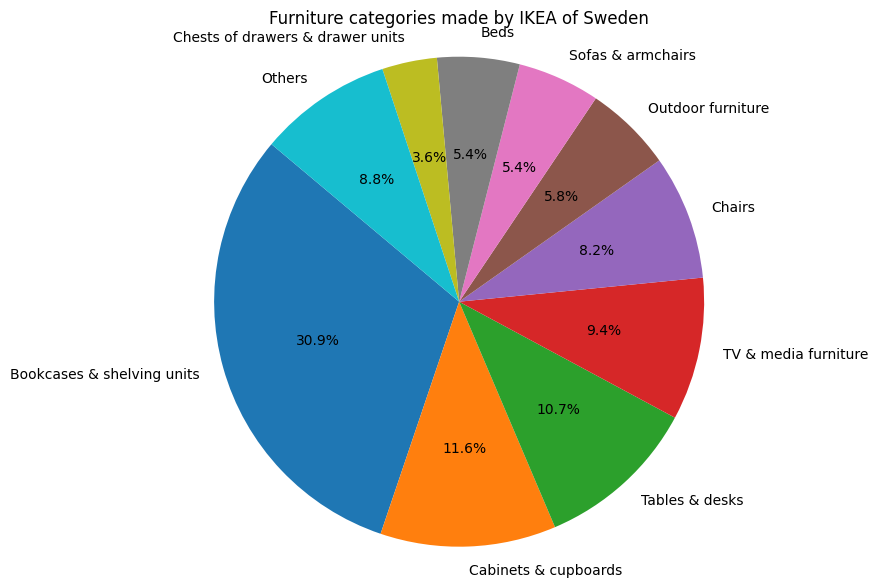

In [ ]:
df_sweden = df[df['designer'] == 'IKEA of Sweden']

category_counts1 = df_sweden['category'].value_counts()

threshold = 30
category_counts1_filtered = category_counts1[category_counts1 >= threshold]
others_count = category_counts1[category_counts1 < threshold].sum()
category_counts1_filtered['Others'] = others_count

plt.figure(figsize=(10, 7))
plt.pie(category_counts1_filtered, labels=category_counts1_filtered.index, autopct='%1.1f%%', startangle=140)
plt.title('Furniture categories made by IKEA of Sweden')
plt.axis('equal')
plt.show()

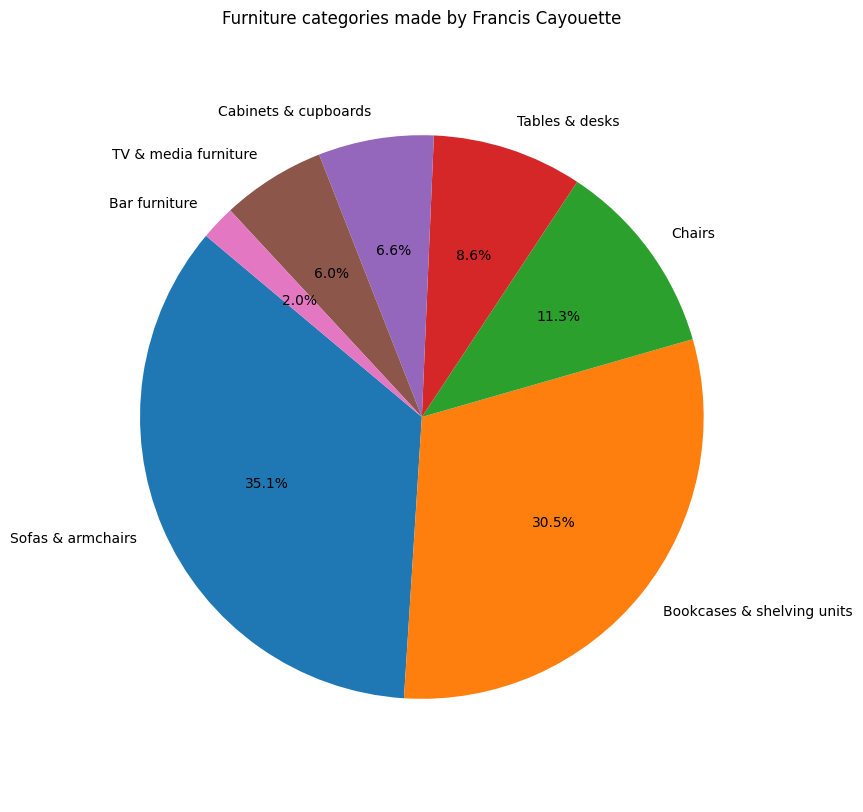

In [ ]:
df_francis = df[df['designer'] == 'Francis Cayouette']

category_counts = df_francis['category'].value_counts()

plt.figure(figsize=(8, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Furniture categories made by Francis Cayouette')
plt.axis('equal')
plt.show()

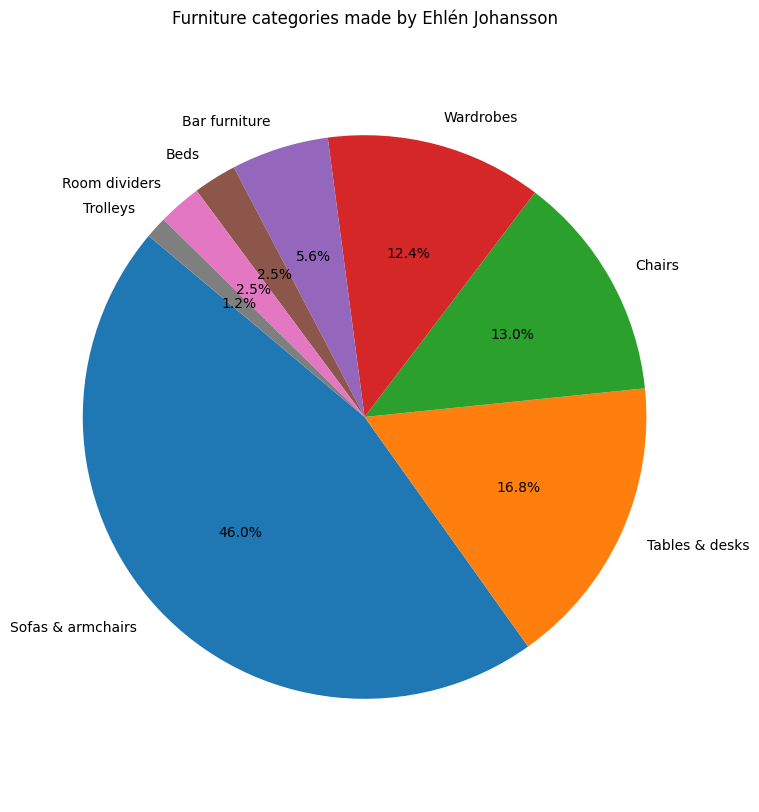

In [ ]:
df_ehlen = df[df['designer'] == 'Ehlén Johansson']

category_counts2 = df_ehlen['category'].value_counts()

plt.figure(figsize=(8, 10))
plt.pie(category_counts2, labels=category_counts2.index, autopct='%1.1f%%', startangle=140)
plt.title('Furniture categories made by Ehlén Johansson')
plt.axis('equal')
plt.show()

#### Я хочу дослідити, чи впливає популярність дизайнера на ціну товарів.
#### Для цього ми розділимо дизайнерів на дві групи: топ-10 (найбільш популярні) і всі інші.

#### Нульова гіпотеза H0: популярність дизайнера не впливає на ціну товару. Ціни між групами дизайнерів не мають статистично значущих відмінностей.

#### Альтернативна гіпотеза H1: у популярних дизайнерів меблі дорожчі, ніж у менш популярних. Популярність дизайнера впливає на ціну товару.


In [ ]:
# Групуємо дизайнерів на топ-10 та інших
top_10_designers = df['designer'].value_counts().nlargest(10).index
df['designer_group'] = np.where(df['designer'].isin(top_10_designers), 'Top_10', 'Others')

# Виводимо кількість елементів в кожній групі, щоб знати що ми погрупували правильно, і вибірки приблизно однакові за розміром
top_10_count = df[df['designer_group'] == 'Top_10'].shape[0]
others_count = df[df['designer_group'] == 'Others'].shape[0]
print(f"Top 10 designers count: {top_10_count}")
print(f"Other designers count: {others_count}")

# Групи для порівняння цін
top_10_prices = df[df['designer_group'] == 'Top_10']['price']
others_prices = df[df['designer_group'] == 'Others']['price']

# 1. T-test (тест Стьюдента)
t_stat, p_value_ttest = stats.ttest_ind(top_10_prices, others_prices, equal_var=False)
print(f"T-test: t-statistic = {t_stat:.2f}, p-value = {p_value_ttest:.4f}")

# 2. Mann-Whitney U test
u_stat, p_value_mannwhitney = stats.mannwhitneyu(top_10_prices, others_prices)
print(f"Mann-Whitney U test: U-statistic = {u_stat:.2f}, p-value = {p_value_mannwhitney:.4f}")

# 3. Kruskal-Wallis test
h_stat, p_value_kruskal = stats.kruskal(top_10_prices, others_prices)
print(f"Kruskal-Wallis test: H-statistic = {h_stat:.2f}, p-value = {p_value_kruskal:.4f}")

Top 10 designers count: 1544
Other designers count: 1418
T-test: t-statistic = -2.78, p-value = 0.0054
Mann-Whitney U test: U-statistic = 1011533.50, p-value = 0.0003
Kruskal-Wallis test: H-statistic = 12.79, p-value = 0.0003


У всіх тестах p-значення значно нижчі за 0.05, що дозволяє відхилити нульову гіпотезу H0, яка припускала, що популярність дизайнера не впливає на ціну.
Це підтверджує альтернативну гіпотезу H1: у більш популярних дизайнерів меблі дорожчі.

price


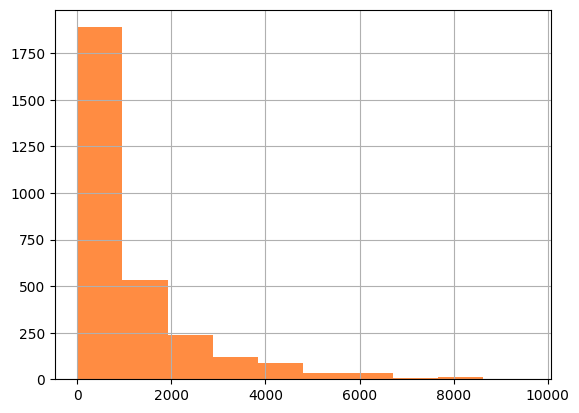

depth


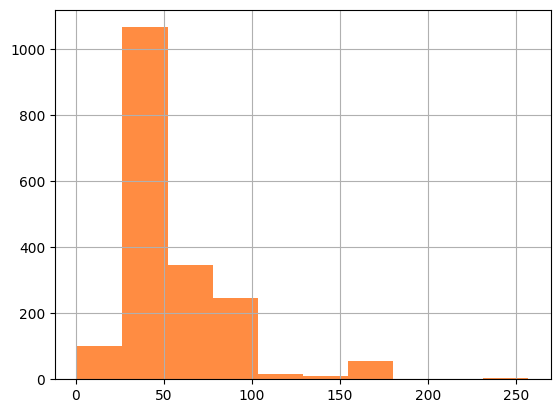

height


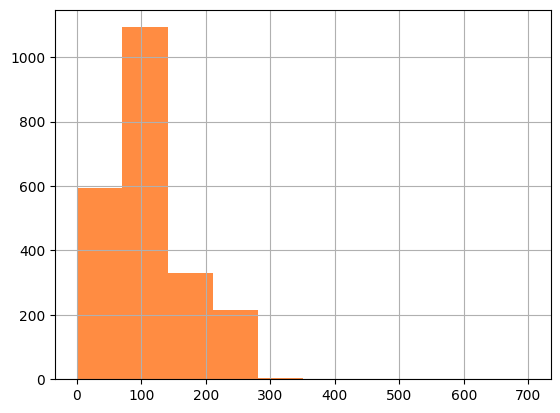

width


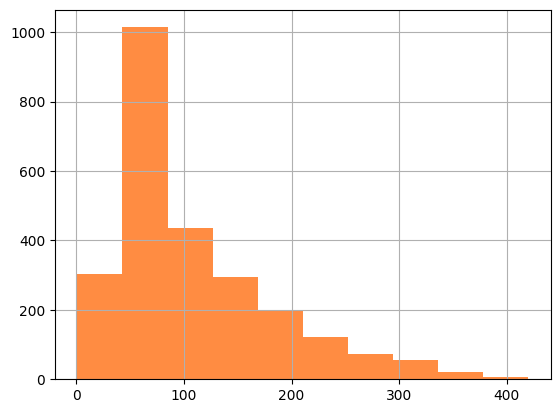

In [ ]:
# Lets investigate depth', 'height', 'width' column
for col in ['price', 'depth', 'height', 'width']:
    print(col)
    plt.hist(df[col], color = '#FF8C42', bins = 10)
    plt.grid()
    plt.show()

In [ ]:
# Вибір ознак і цільової змінної
X = df[['height', 'width', 'depth']]
y = df['price']

# Заповнюємо NaN значенням медіани для кожного стовпця в X
X = X.fillna(X.median())

# Розрахунок взаємної інформації
mi = mutual_info_regression(X, y)

# Створюємо DataFrame для візуалізації результатів
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi
})

# Сортуємо за значенням взаємної інформації та виводимо результати
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
print(mi_df)

  Feature  Mutual Information
1   width            0.590447
0  height            0.402378
2   depth            0.311249


Результат показує важливість кожної ознаки (width, height і depth) для передбачення цільової змінної price на основі взаємної інформації:

width має найвищу взаємну інформацію (0.580743), що вказує на те, що ця ознака є найбільш інформативною для передбачення price.

height іде наступною (0.407704), вона також релевантна, але менш впливова.

depth має найнижче значення (0.296770), що вказує на слабший зв’язок із price.

Ці значення допомагають визначити пріоритети ознак, які варто залишити для моделювання.

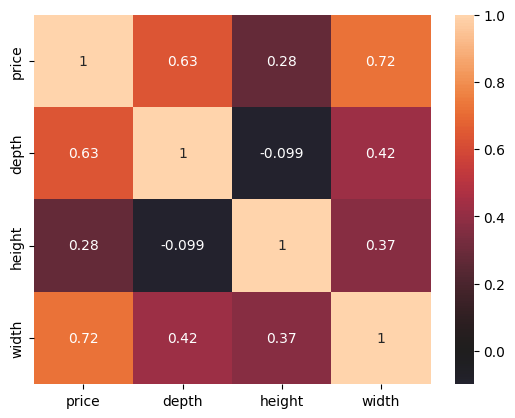

In [ ]:
# Pearson correlation, which measures the linear relationship between features.
# Pearson values range from -1 (negative linear relationship) to 1 (positive linear relationship), with 0 indicating no linear correlation.
sns.heatmap(df[['price', 'depth', 'height', 'width']].corr(), xticklabels= df[['price', 'depth', 'height', 'width']].corr().columns,
            yticklabels= df[['price', 'depth', 'height', 'width']].corr().columns, center= 0, annot= True);

####Згідно з тепловою картою, яка побудована за методом Пірсона, можна зробити наступні висновки:

Ознака width має найвищу кореляцію з цільовою змінною price (0.72), що вказує на сильний позитивний лінійний зв’язок.
Це означає, що зміни у width мають значний вплив на price.

Ознака depth також демонструє досить високу кореляцію з price (0.63), хоча цей зв'язок слабкіший, ніж у width.

Між ознаками height і width є позитивна кореляція (0.37), хоча вона менш значна, ніж очікувалось, що вказує на помірний взаємозв’язок.

Мінімальна кореляція спостерігається між height і depth (-0.099), що фактично вказує на відсутність лінійного зв’язку між цими ознаками.

Загалом, ознаки width і depth є найбільш значущими для передбачення price через їх високу лінійну кореляцію з цільовою змінною.

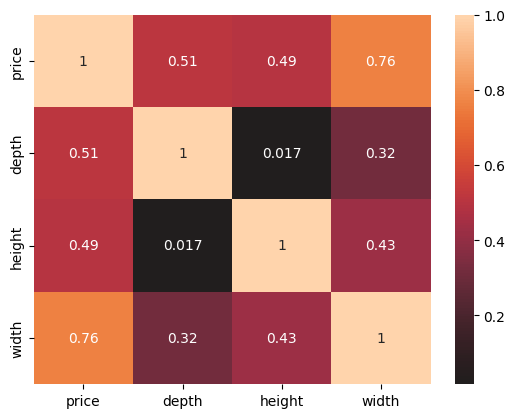

In [ ]:
# Spearman correlation (specified with method='spearman'), which measures monotonic relationships.
# Spearman is suitable for non-linear but monotonic associations and is less sensitive to outliers.
df_X = df[['price', 'depth', 'height', 'width']]
sns.heatmap(df_X.corr(method= 'spearman'), xticklabels= df_X.corr().columns,
            yticklabels= df_X.corr().columns, center= 0, annot= True);

Згідно з тепловою картою Спірмана, ознака width, аналогічно до попередньої теплової карти, має найвищу кореляцію з нашою цільовою змінною price (0,76). Найсильніша кореляція між ознаками спостерігається між height і width (0,43), що, ймовірно, пов’язано з їх впливовістю у передбаченні price.

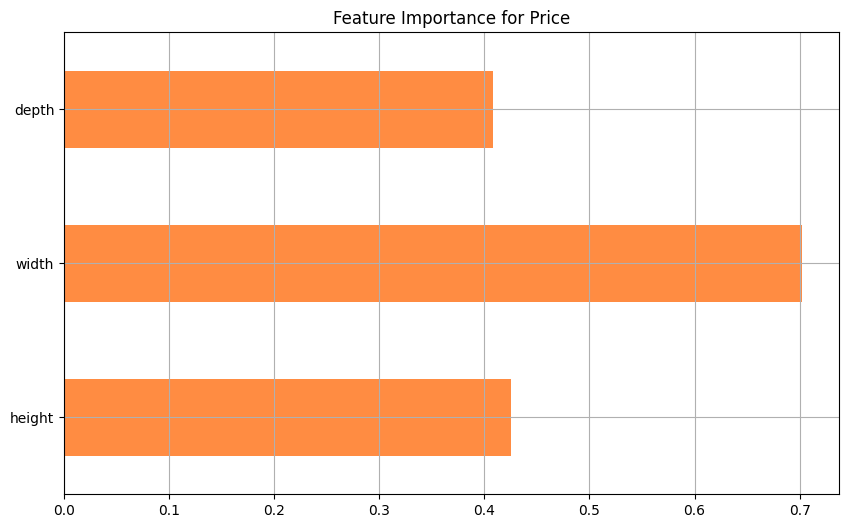

In [ ]:
# Example data
df1 = df.copy()
df1.dropna(inplace=True)

# Define features and target variable
w_df_X = df1[['height', 'width', 'depth']]
w_df_y = df1['price']

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Color
color_1 = '#FF8C42'

# Calculate mutual information for the continuous target variable 'price'
importance = mutual_info_regression(w_df_X, w_df_y)
feature_importances = pd.Series(importance, w_df_X.columns)

# Plot feature importance
feature_importances.plot(kind='barh', color=color_1, ax=ax)
ax.set_title("Feature Importance for Price")
ax.grid(True)

# Show plot
plt.show()

На графіку показано значущість ознак height, width та depth для прогнозування змінної price, де width має найбільший вплив.

##Моя гіпотеза: ціна товарів залежить від їх розміру.

###Нульова гіпотеза. - розмір товару не впливає на його ціну

###Альтернативна гіпотеза. розмір товару впливає на його ціну

In [ ]:
import statsmodels.api as sm
from scipy.stats import pearsonr

# Create a copy of the original dataframe for processing
df2 = df.copy()

# Fill missing values with the median by category
for feature in ['depth', 'height', 'width']:
    median_values = df2.groupby('category')[feature].transform('median')
    df2[f'{feature}_1'] = df2[feature].fillna(median_values)

# Create the 'size' variable as the product of depth, height, and width
df2['size'] = df2['depth_1'] * df2['height_1'] * df2['width_1']

# Linear regression: predicting price based on size
Y = df2['price']
X = sm.add_constant(df2['size'])  # Add a constant to the model
model = sm.OLS(Y, X).fit()

# Print the main results of the model
print(model.summary())
print(f"\nt-values:\n{model.tvalues}")
print(f"p-values:\n{model.pvalues}")

# Calculate and print the correlation and p-value between 'size' and 'price'
correlation, p_value = pearsonr(df2['size'], df2['price'])
print(f'\nCorrelation between size and price: {correlation}, p-value: {p_value}')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     2613.
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:28:43   Log-Likelihood:                -24709.
No. Observations:                2962   AIC:                         4.942e+04
Df Residuals:                    2960   BIC:                         4.943e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        334.8646     24.032     13.934      0.0

####Коефіцієнти моделі:
const: 334.8646, size: 0.0010. Це означає, що базова ціна (при нульовому розмірі) становить приблизно 334.86. Кожна одиниця збільшення розміру додає до ціни 0.001.

####R-squared:
Значення R-squared = 0.469 свідчить, що 46.9% варіації в ціні можна пояснити розміром товару. Це середній показник, який вказує, що розмір має вплив на ціну, але є й інші важливі фактори, які також впливають на неї.

####F-статистика:
F-statistic: 2613, p-value: 0.00. Високе значення F-статистики та нульове p-value (менше 0.05) підтверджують, що модель значуща, і незалежна змінна (size) суттєво впливає на залежну змінну (price).

####T-статистика та p-value:
const: t-value = 13.93, p-value = 8.5e-43; size: t-value = 51.12, p-value = 0.00. Високі t-статистики та дуже малі p-value (значно менші за 0.05) свідчать про статистичну значущість обох коефіцієнтів, що підтверджує значущість як базової ціни, так і впливу розміру на ціну.

####Кореляція:
Кореляція: 0.684, p-value: 0.0. Висока кореляція між розміром і ціною (0.684) підтверджує значний позитивний вплив розміру на ціну, тобто чим більший розмір товару, тим вища його ціна.

####Висновок:
Аналізуючи результати тестів, можна відкинути нульову гіпотезу і прийняти альтернативну: залежність між розміром товару і його ціною існує, і вона є статистично значущою.


#Pipeline

In [ ]:
df.isnull().sum()

,0
item_id,0
name,0
category,0
price,0
old_price,0
sellable_online,0
link,0
other_colors,0
short_description,0
designer,0


##Step 1: Data Preprocessing and Initial Model with DecisionTreeRegressor

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# Define features and target variable
X = df[['depth', 'width', 'height', 'category', 'designer_clean', 'other_colors']]
Y = df['price']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create pipelines for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, ['depth', 'width', 'height']),
    ('cat', categorical_transformer, ['category', 'designer_clean', 'other_colors'])
])

# Create pipeline for DecisionTreeRegressor model
dtr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(max_depth=10, random_state=42))
])

# Train the model
dtr_pipeline.fit(X_train, Y_train)

# Predictions
dtr_predictions = dtr_pipeline.predict(X_test)

# Evaluate model performance
print('R^2:', dtr_pipeline.score(X_test, Y_test))
print('MAE:', metrics.mean_absolute_error(Y_test, dtr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, dtr_predictions)))

R^2: 0.7412989254589928
MAE: 396.6571601278343
RMSE: 706.1464322715236


##Step 2: Manual Data Filling and Feature Engineering

In [ ]:
# Fill missing values in numerical columns based on the median within each category
median_d = df.groupby('category')['depth'].transform('median')
median_h = df.groupby('category')['height'].transform('median')
median_w = df.groupby('category')['width'].transform('median')

# Fill missing values in 'price' for each category and designer
df['depth_1'] = df['depth'].fillna(median_d)
df['height_1'] = df['height'].fillna(median_h)
df['width_1'] = df['width'].fillna(median_w)

# Create median price per category and designer for feature engineering
df['category_median_price'] = df.groupby('category')['price'].transform('median')
df['designer_median_price'] = df.groupby('designer_clean')['price'].transform('median')

##Step 3: Function for Comparing Multiple Regressor Models

In [ ]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Function to train and evaluate multiple regression models
def getBestRegressor(X, Y):
    # Split data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Define models to evaluate
    models = [
        LinearRegression(),
        LassoCV(),
        RidgeCV(),
        SVR(kernel='linear'),
        KNeighborsRegressor(n_neighbors=16),
        DecisionTreeRegressor(max_depth=10, random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor()
    ]

    # Store model performance metrics
    TestModels = pd.DataFrame()
    for model in models:
        model.fit(X_train, Y_train)
        model_name = model.__class__.__name__

        # Collect performance metrics
        performance = {
            'Model': model_name,
            'R^2': model.score(X_test, Y_test),
            'MAE': metrics.mean_absolute_error(Y_test, model.predict(X_test)),
            'RMSE': np.sqrt(metrics.mean_squared_error(Y_test, model.predict(X_test)))
        }

        # Append to DataFrame
        TestModels = pd.concat([TestModels, pd.DataFrame([performance])], ignore_index=True)

    # Set model name as index
    TestModels.set_index('Model', inplace=True)
    return TestModels

# Using improved data features for comparison
X1 = df[['depth_1', 'width_1', 'height_1']]
Y1 = df['price']

# Get model performance results
test_results = getBestRegressor(X1, Y1)
print(test_results.sort_values(by='R^2', ascending=False))

                                R^2         MAE         RMSE
Model                                                       
RandomForestRegressor      0.738008  378.326439   710.624120
GradientBoostingRegressor  0.686284  468.681112   777.613984
DecisionTreeRegressor      0.661976  444.013606   807.178329
KNeighborsRegressor        0.645453  489.292870   826.670277
LinearRegression           0.401250  670.612052  1074.282602
RidgeCV                    0.401250  670.612090  1074.282644
LassoCV                    0.401175  670.707013  1074.349374
SVR                        0.351657  641.010157  1117.887309


##Step 4: Hyperparameter Tuning with GridSearchCV for RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

# Split data for Random Forest hyperparameter tuning
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Define the hyperparameter grid
forest_params = {
    'n_estimators': [10, 30, 60, 100, 130, 160, 200],
    'max_depth': [10, 30, 50, 70, 100, 150, 180, 200, None],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV for RandomForestRegressor
forest_grid = GridSearchCV(RandomForestRegressor(random_state=42), forest_params, cv=5, n_jobs=-1, verbose=0)
forest_grid.fit(X_train, Y_train)

# Print best parameters and performance
print('Best Estimator:', forest_grid.best_estimator_)
print('Best Score:', forest_grid.best_score_)
print('R^2:', metrics.r2_score(Y_test, forest_grid.predict(X_test)))
print('MAE:', metrics.mean_absolute_error(Y_test, forest_grid.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, forest_grid.predict(X_test))))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
315 fits failed out of a total of 945.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
123 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Estimator: RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=200,
                      random_state=42)
Best Score: 0.775101176182748
R^2: 0.753385540875831
MAE: 371.02840218152465
RMSE: 689.4534051413933


##Step 5: Feature Importance Visualization for RandomForestRegressor

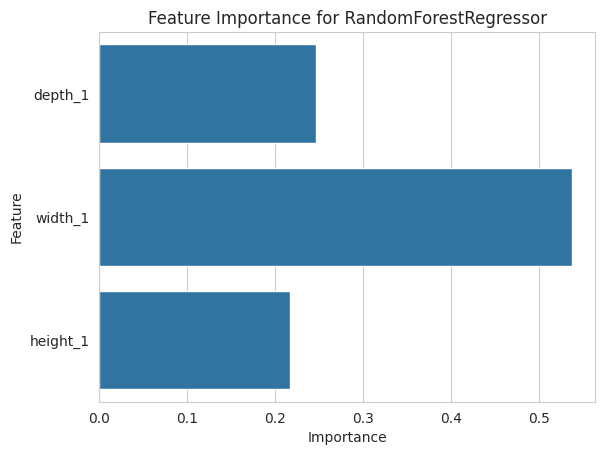

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Feature importance visualization for RandomForestRegressor
sns.set_style('whitegrid')
sns.barplot(x=forest_grid.best_estimator_.feature_importances_, y=X_train.columns)
plt.title('Feature Importance for RandomForestRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##Step 6: Hyperparameter Tuning with GridSearchCV for DecisionTreeRegressor

In [ ]:
# Hyperparameter tuning for DecisionTreeRegressor
decision_params = {'max_depth': [10, 30, 50, 70, 100, 150, 180, 200, None]}
decision_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), decision_params, cv=5, n_jobs=-1)
decision_grid.fit(X_train, Y_train)

# Print best parameters and performance
print('Best Estimator:', decision_grid.best_estimator_)
print('Best Score:', decision_grid.best_score_)
print('R^2:', metrics.r2_score(Y_test, decision_grid.predict(X_test)))
print('MAE:', metrics.mean_absolute_error(Y_test, decision_grid.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, decision_grid.predict(X_test))))

Best Estimator: DecisionTreeRegressor(max_depth=30, random_state=42)
Best Score: 0.6777473775862427
R^2: 0.6458265946392325
MAE: 409.111001376054
RMSE: 826.2350730978554


##Step 7: Feature Importance Visualization for DecisionTreeRegressor

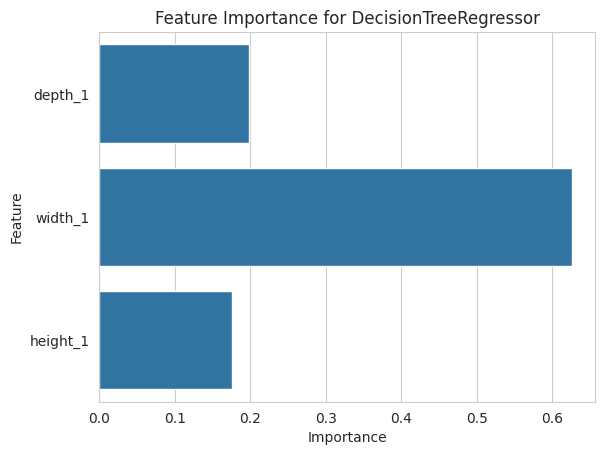

In [ ]:
# Feature importance visualization for DecisionTreeRegressor
sns.barplot(x=decision_grid.best_estimator_.feature_importances_, y=X_train.columns)
plt.title('Feature Importance for DecisionTreeRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##Final Analysis
Summary of the most important features based on RandomForestRegressor and DecisionTreeRegressor.

After evaluating feature importance, the top features for predicting price are typically 'width', 'depth', and 'height'.

The tuned RandomForestRegressor model has shown to be the best-performing model.
